<a href="https://colab.research.google.com/github/Shahedur23036883/Cerebral-Stroke-Prediction/blob/main/cerebral_stroke_prediction_ipynb_real_ipynb2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Step 1: Load the dataset

In [12]:
df=pd.read_csv("//content/dataset.csv.zip")

In [13]:
df

id  gender   age  hypertension  heart_disease ever_married  \
0      30669    Male   3.0             0              0           No   
1      30468    Male  58.0             1              0          Yes   
2      16523  Female   8.0             0              0           No   
3      56543  Female  70.0             0              0          Yes   
4      46136    Male  14.0             0              0           No   
...      ...     ...   ...           ...            ...          ...   
43395  56196  Female  10.0             0              0           No   
43396   5450  Female  56.0             0              0          Yes   
43397  28375  Female  82.0             1              0          Yes   
43398  27973    Male  40.0             0              0          Yes   
43399  36271  Female  82.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0          children          Rural              95.12  18.0              NaN   
1           Private          Urban              87.96  39.2     never smoked   
2           Private          Urban             110.89  17.6              NaN   
3           Private          Rural              69.04  35.9  formerly smoked   
4      Never_worked          Rural             161.28  19.1              NaN   
...             ...            ...                ...   ...              ...   
43395      children          Urban              58.64  20.4     never smoked   
43396      Govt_job          Urban             213.61  55.4  formerly smoked   
43397       Private          Urban              91.94  28.9  formerly smoked   
43398       Private          Urban              99.16  33.2     never smoked   
43399       Private          Urban              79.48  20.6     never smoked   

       stroke  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
43395       0  
43396       0  
43397       0  
43398       0  
43399       0  

[43400 rows x 12 columns]

# Step 2: Exploratory Data Analysis (EDA)

In [14]:
df.head()

id  gender   age  hypertension  heart_disease ever_married  \
0  30669    Male   3.0             0              0           No   
1  30468    Male  58.0             1              0          Yes   
2  16523  Female   8.0             0              0           No   
3  56543  Female  70.0             0              0          Yes   
4  46136    Male  14.0             0              0           No   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0      children          Rural              95.12  18.0              NaN   
1       Private          Urban              87.96  39.2     never smoked   
2       Private          Urban             110.89  17.6              NaN   
3       Private          Rural              69.04  35.9  formerly smoked   
4  Never_worked          Rural             161.28  19.1              NaN   

   stroke  
0       0  
1       0  
2       0  
3       0  
4       0

In [15]:
df.tail()

id  gender   age  hypertension  heart_disease ever_married  \
43395  56196  Female  10.0             0              0           No   
43396   5450  Female  56.0             0              0          Yes   
43397  28375  Female  82.0             1              0          Yes   
43398  27973    Male  40.0             0              0          Yes   
43399  36271  Female  82.0             0              0          Yes   

      work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
43395  children          Urban              58.64  20.4     never smoked   
43396  Govt_job          Urban             213.61  55.4  formerly smoked   
43397   Private          Urban              91.94  28.9  formerly smoked   
43398   Private          Urban              99.16  33.2     never smoked   
43399   Private          Urban              79.48  20.6     never smoked   

       stroke  
43395       0  
43396       0  
43397       0  
43398       0  
43399       0

In [16]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [17]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [18]:
df.shape

(43400, 12)

In [19]:
df.describe()

id           age  hypertension  heart_disease  \
count  43400.000000  43400.000000  43400.000000   43400.000000   
mean   36326.142350     42.217894      0.093571       0.047512   
std    21072.134879     22.519649      0.291235       0.212733   
min        1.000000      0.080000      0.000000       0.000000   
25%    18038.500000     24.000000      0.000000       0.000000   
50%    36351.500000     44.000000      0.000000       0.000000   
75%    54514.250000     60.000000      0.000000       0.000000   
max    72943.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       43400.000000  41938.000000  43400.000000  
mean          104.482750     28.605038      0.018041  
std            43.111751      7.770020      0.133103  
min            55.000000     10.100000      0.000000  
25%            77.540000     23.200000      0.000000  
50%            91.580000     27.700000      0.000000  
75%           112.070000     32.900000      0.000000  
max           291.050000     97.600000      1.000000

In [20]:
df.isnull().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

# Check duplicates

In [21]:
df.duplicated().sum()

np.int64(0)

# Drop duplicates

In [22]:
df.drop_duplicates(inplace=True)
print('\nNumber of duplicates after dropping')
print(df.duplicated().sum())


Number of duplicates after dropping
0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


# Step 4: Initial Exploratory Data Analysis (EDA)

# Summary statistics

In [24]:
print(df.describe())

                 id           age  hypertension  heart_disease  \
count  43400.000000  43400.000000  43400.000000   43400.000000   
mean   36326.142350     42.217894      0.093571       0.047512   
std    21072.134879     22.519649      0.291235       0.212733   
min        1.000000      0.080000      0.000000       0.000000   
25%    18038.500000     24.000000      0.000000       0.000000   
50%    36351.500000     44.000000      0.000000       0.000000   
75%    54514.250000     60.000000      0.000000       0.000000   
max    72943.000000     82.000000      1.000000       1.000000   

       avg_glucose_level           bmi        stroke  
count       43400.000000  41938.000000  43400.000000  
mean          104.482750     28.605038      0.018041  
std            43.111751      7.770020      0.133103  
min            55.000000     10.100000      0.000000  
25%            77.540000     23.200000      0.000000  
50%            91.580000     27.700000      0.000000  
75%           112.07

# Stroke value counts

In [25]:
print(df.stroke.value_counts())

stroke
0    42617
1      783
Name: count, dtype: int64


# Histograms for all numerical columns

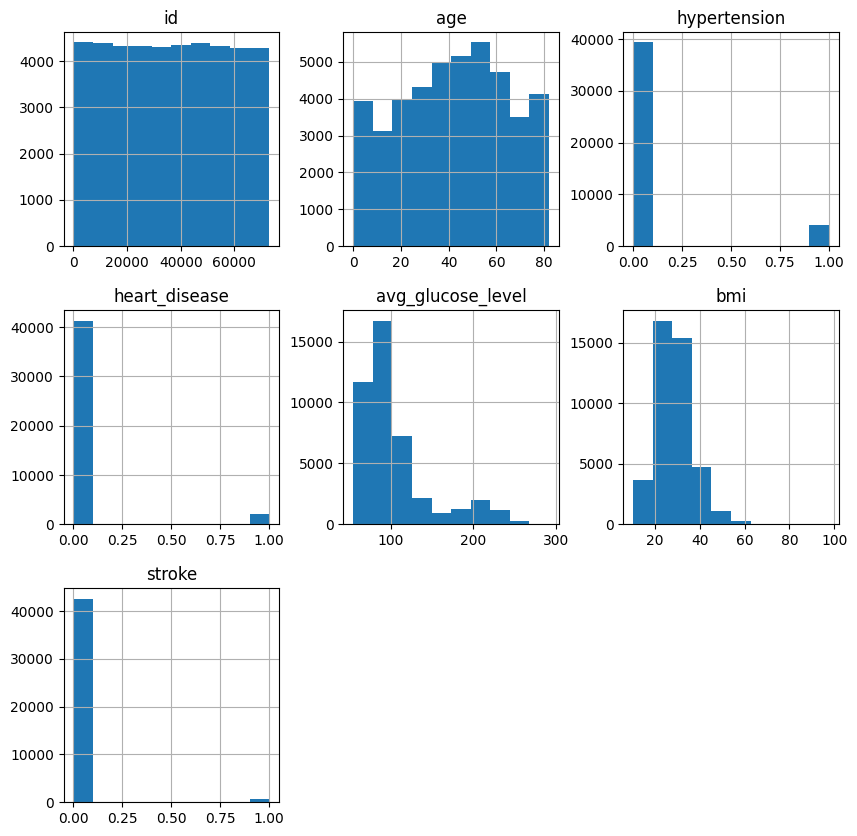

In [26]:
df.hist(figsize=(10, 10))
plt.show()

# Distribution of numerical columns with KDE

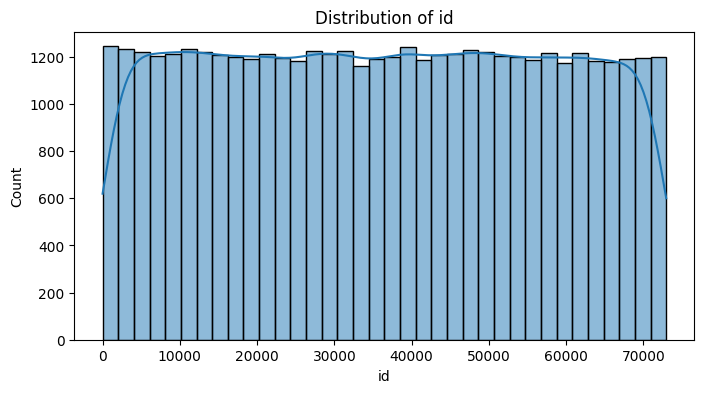

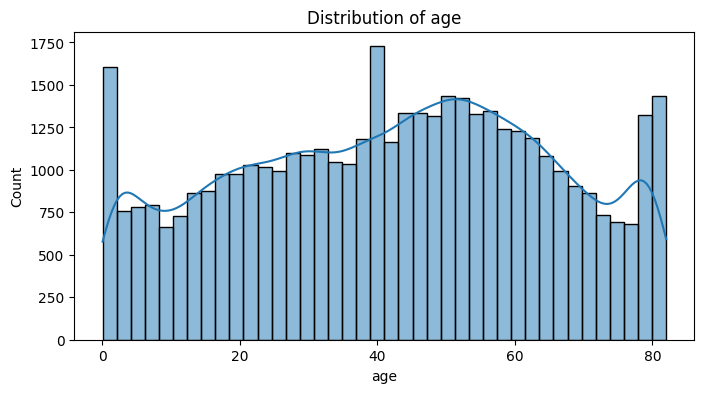

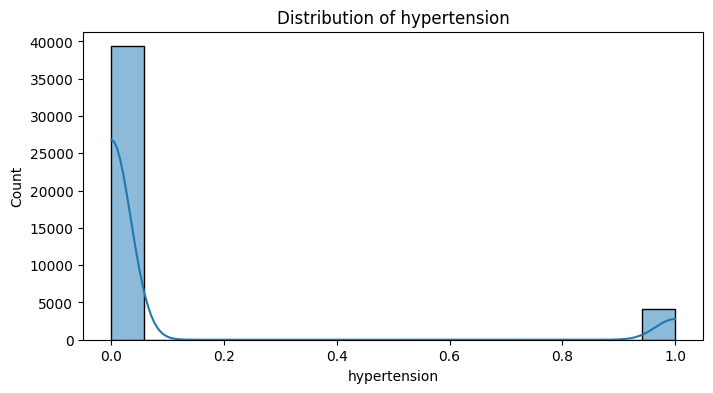

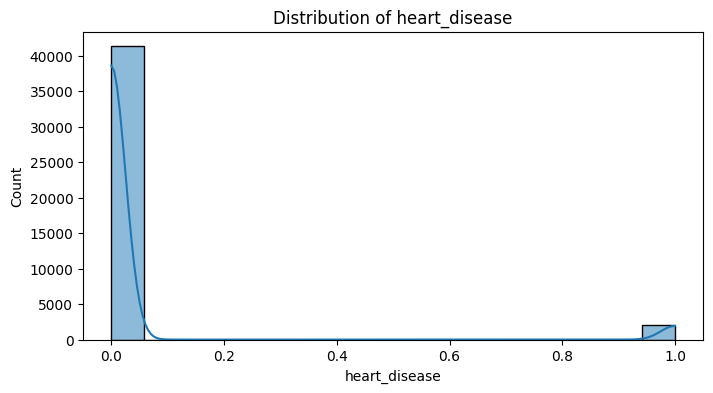

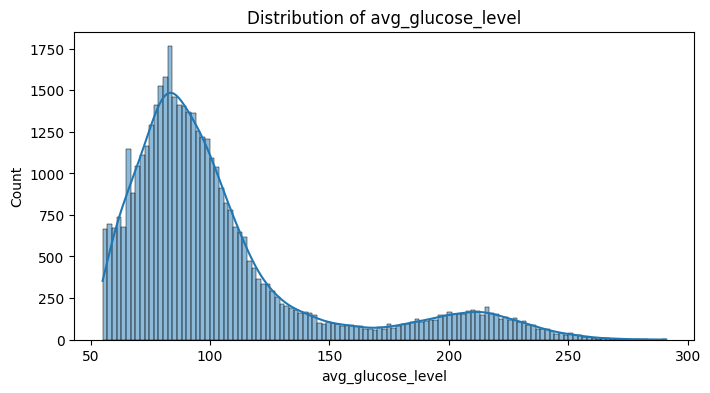

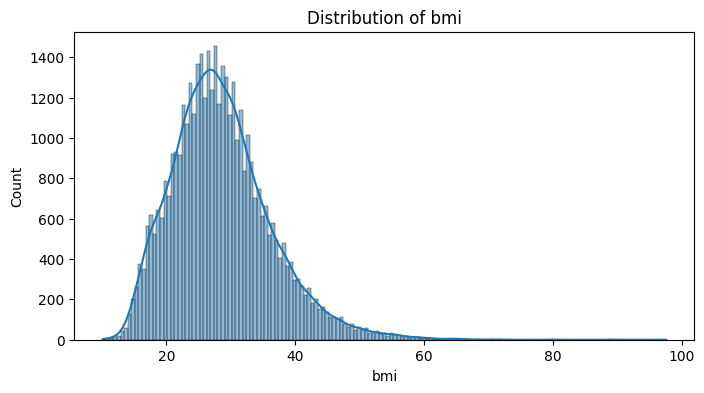

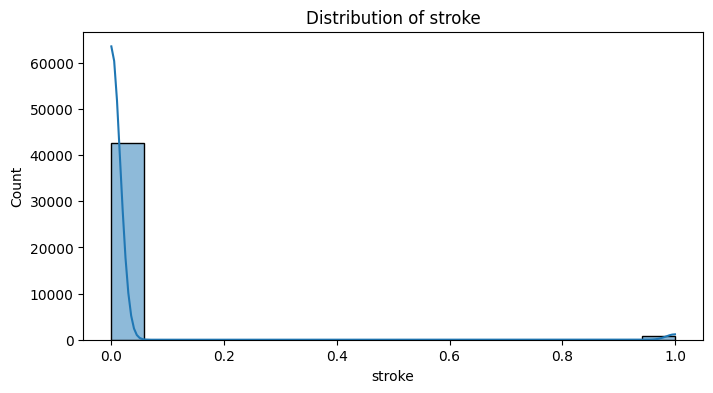

In [27]:
numerical_cols = df.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Distribution of categorical columns

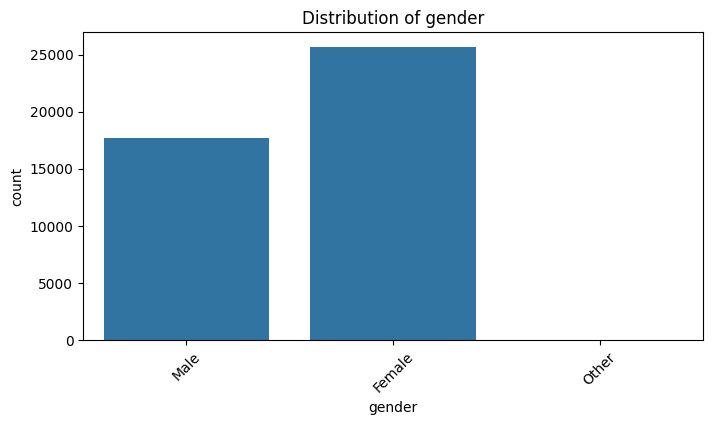

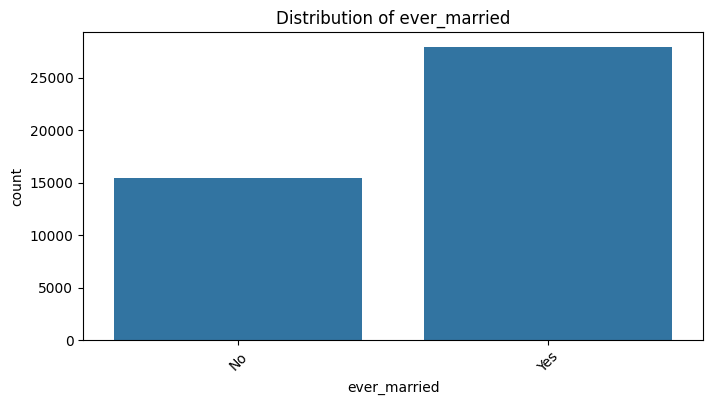

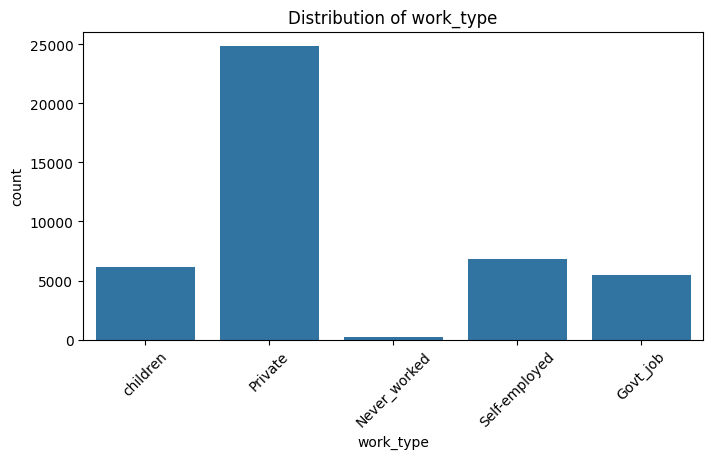

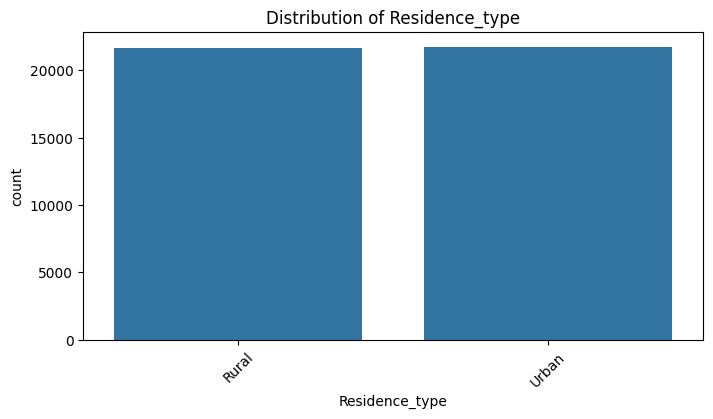

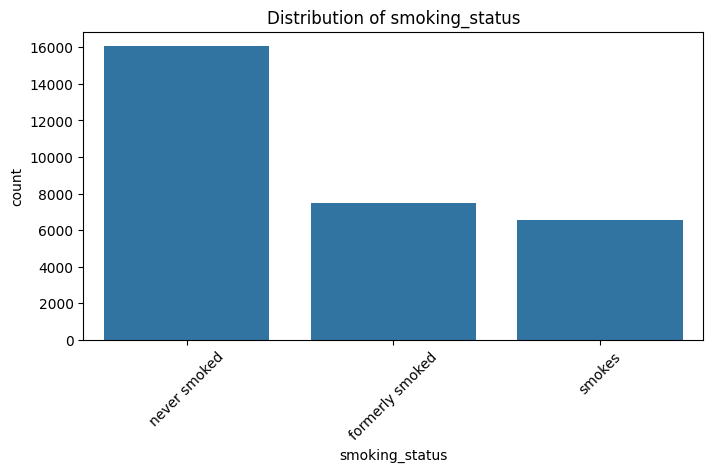

In [28]:
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.show()

# Distribution of target variable 'stroke

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(x='stroke', data=df, palette='Set2')
plt.title('Distribution of Stroke')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

<ipython-input-29-f44846530d4b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='Set2')


#"Visualizing the Distribution of Stroke Occurrences Across Age Groups and Genders"

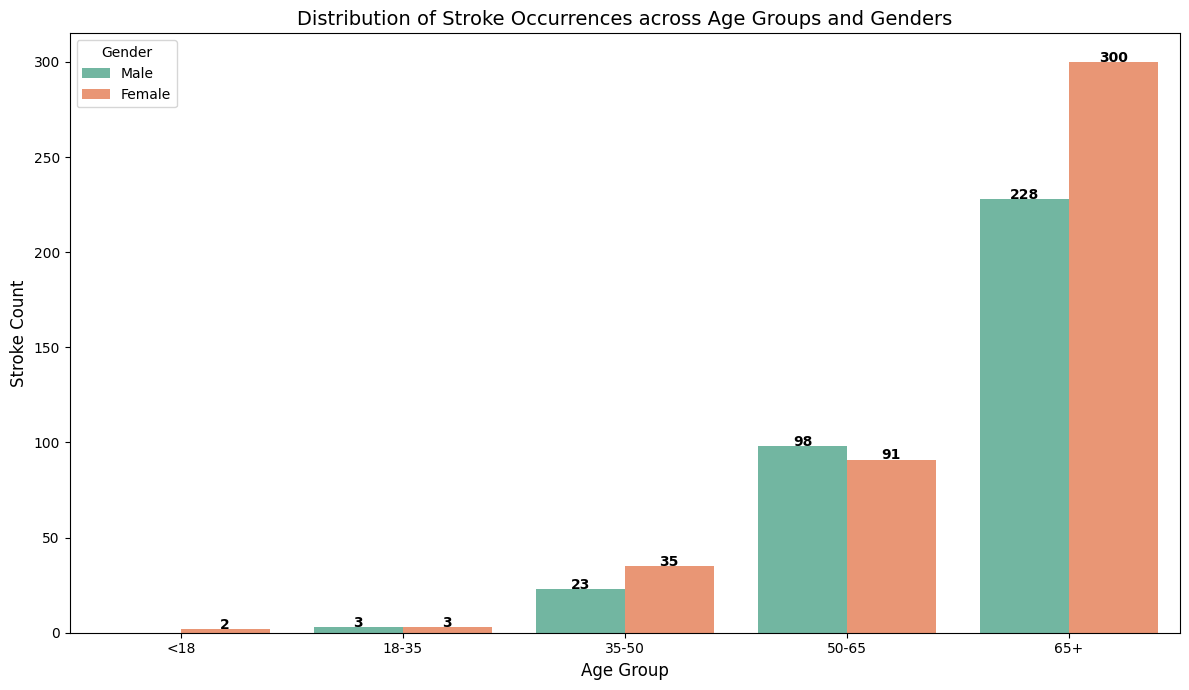

Plot with count labels generated successfully.


In [30]:
# Load the dataset
eda_data = df.copy()  # Create a copy of the original DataFrame 'df' and assign it to 'eda_data'
# Create age groups/bins. Adjust bins according to the available age range.
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['<18', '18-35', '35-50', '50-65', '65+']
eda_data['age_group'] = pd.cut(eda_data['age'], bins=age_bins, labels=age_labels, right=False)

# Create age groups/bins. Adjust bins according to the available age range.
age_bins = [0, 18, 35, 50, 65, 100]
age_labels = ['<18', '18-35', '35-50', '50-65', '65+']
eda_data['age_group'] = pd.cut(eda_data['age'], bins=age_bins, labels=age_labels, right=False)

# Filter the dataframe to rows where stroke occurred
stroke_df = eda_data[eda_data['stroke'] == 1]

# Plot the distribution of stroke occurrences across age groups and genders
plt.figure(figsize=(12, 7))
ax = sns.countplot(data=stroke_df, x='age_group', hue='gender', palette='Set2', order=age_labels)
plt.title('Distribution of Stroke Occurrences across Age Groups and Genders', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Stroke Count', fontsize=12)
plt.legend(title='Gender', fontsize=10)

# Add count labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    if not np.isnan(height) and height > 0:  # Only add text if the bar exists and has height
        ax.text(p.get_x() + p.get_width()/2., height + 0.1,
                int(height),
                ha="center", fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("Plot with count labels generated successfully.")

#"Analyzing the Impact of Work Type and Smoking Status on Average Glucose Levels"




Average Glucose Levels by Work Type and Smoking Status:
smoking_status  formerly smoked  never smoked      smokes
work_type                                                
Govt_job             112.406774    106.726831  106.225747
Never_worked         116.894444     92.850588  122.901429
Private              109.575187    104.059659  105.538546
Self-employed        117.819199    111.015238  114.492013
children              91.074135     92.219208  102.961111


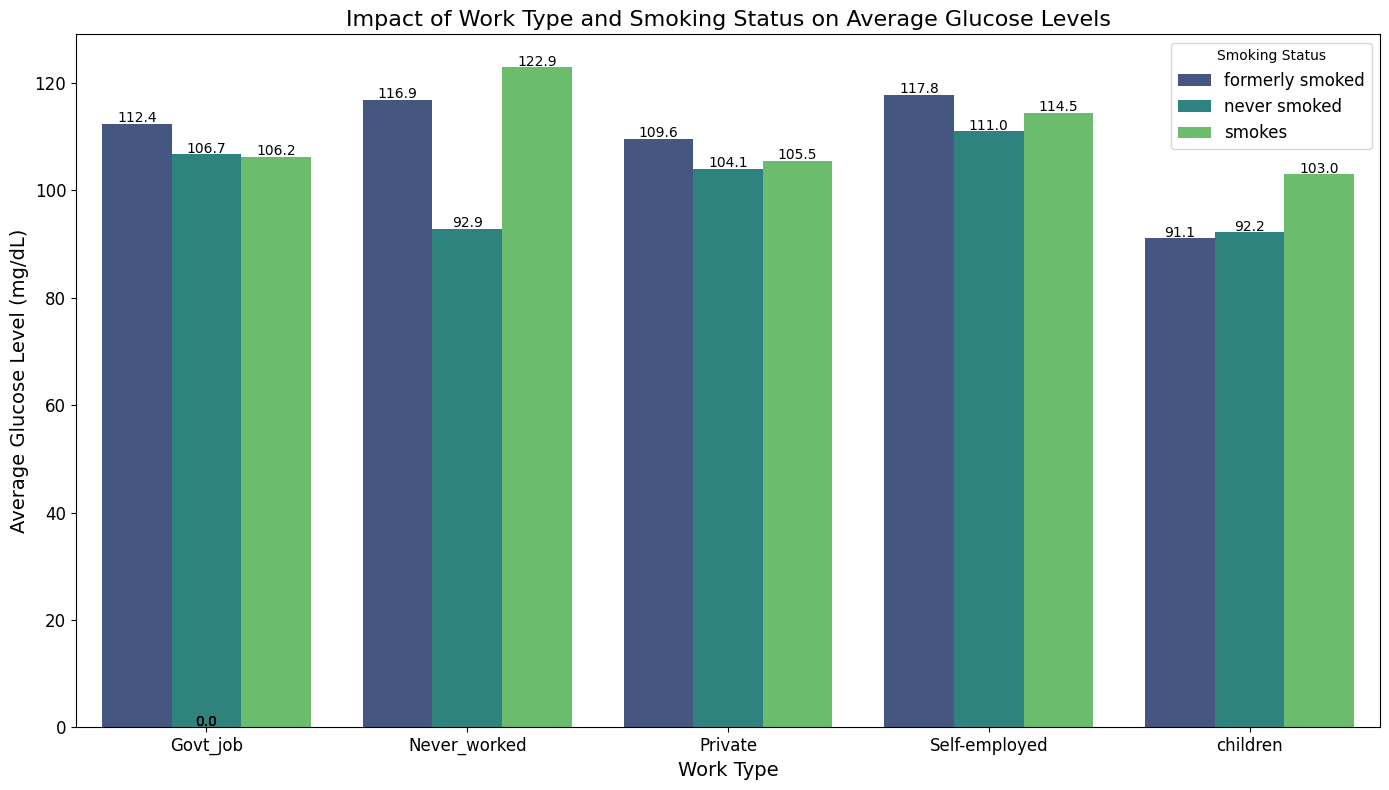

In [21]:
# Calculate average glucose levels by work_type and smoking_status
glucose_by_work_smoking = eda_data.groupby(['work_type', 'smoking_status'])['avg_glucose_level'].mean().reset_index()
# Create a pivot table for easier visualization
pivot_table = glucose_by_work_smoking.pivot(index='work_type', columns='smoking_status', values='avg_glucose_level')
print("\nAverage Glucose Levels by Work Type and Smoking Status:")
print(pivot_table)

# Visualize the data with a grouped bar chart
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='work_type', y='avg_glucose_level', hue='smoking_status', data=glucose_by_work_smoking, palette='viridis')
plt.title('Impact of Work Type and Smoking Status on Average Glucose Levels', fontsize=16)
plt.xlabel('Work Type', fontsize=14)
plt.ylabel('Average Glucose Level (mg/dL)', fontsize=14)
plt.legend(title='Smoking Status', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)

# Add value labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 0.3, f'{height:.1f}', ha="center", fontsize=10)

plt.tight_layout()
plt.show()

#Stroke Probability by Smoking Status, BMI, and Glucose Levels

<ipython-input-31-2bca02201dfb>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stroke_by_smoking_bmi_glucose = df.groupby(['smoking_status', 'bmi_bracket', 'glucose_bracket'])['stroke'].mean().reset_index()


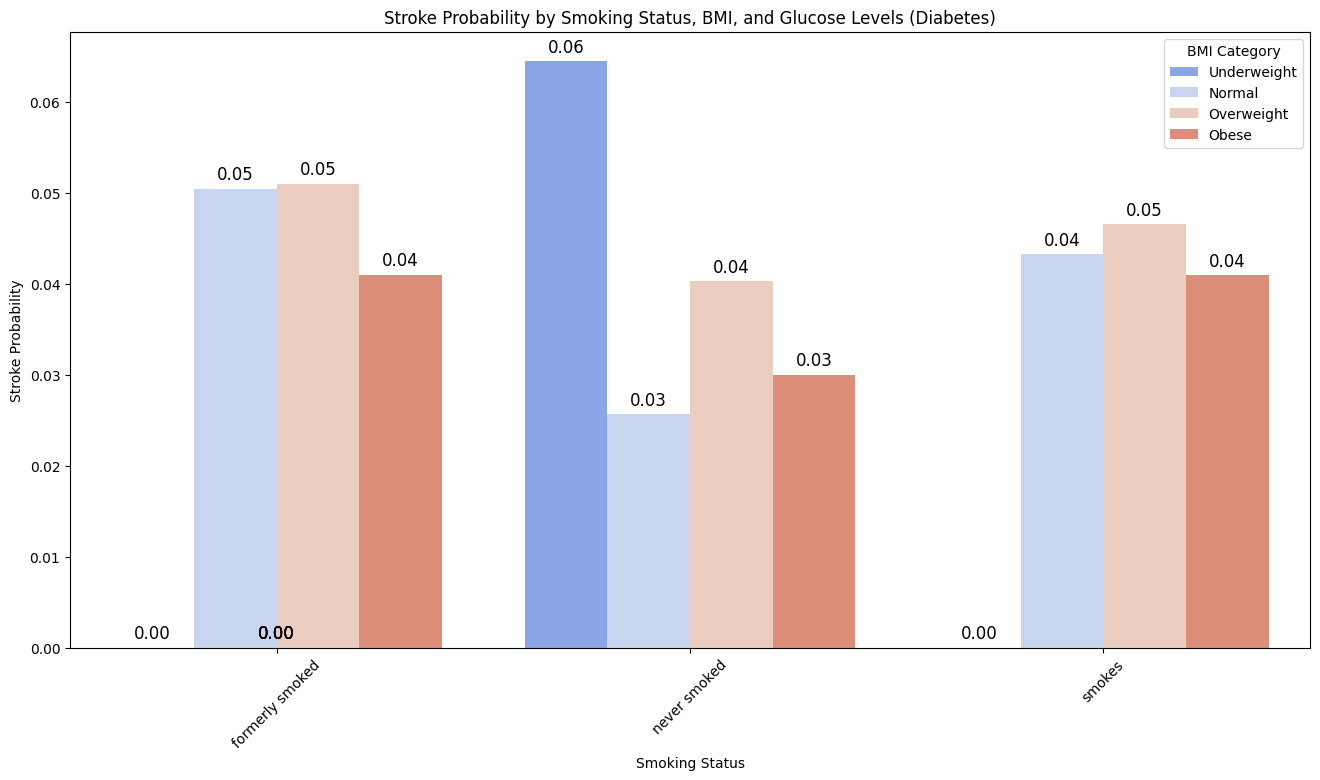

In [31]:
# Define BMI categories
bmi_bins = [0, 18.5, 25, 30, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese']

# Create 'bmi_bracket' column using pd.cut
df['bmi_bracket'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

# Define glucose level categories
glucose_bins = [0, 100, 125, 1000]  # Adjust bins if needed
glucose_labels = ['Normal', 'Prediabetes', 'Diabetes']

# Create 'glucose_bracket' column using pd.cut
df['glucose_bracket'] = pd.cut(df['avg_glucose_level'], bins=glucose_bins, labels=glucose_labels)

# Grouping
stroke_by_smoking_bmi_glucose = df.groupby(['smoking_status', 'bmi_bracket', 'glucose_bracket'])['stroke'].mean().reset_index()

# **Fix Filtering Issue**: Use 'Diabetes' instead of '200+'
filtered_df = stroke_by_smoking_bmi_glucose[stroke_by_smoking_bmi_glucose['glucose_bracket'] == 'Diabetes']

# Plot
plt.figure(figsize=(16, 8))
ax = sns.barplot(x='smoking_status', y='stroke', hue='bmi_bracket', data=filtered_df, palette='coolwarm')

# Title and Labels
plt.title('Stroke Probability by Smoking Status, BMI, and Glucose Levels (Diabetes)')
plt.xlabel('Smoking Status')
plt.ylabel('Stroke Probability')

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Add value labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.legend(title='BMI Category')
plt.show()


#Correlation Matrix with Heatmap

In [32]:
# Create interaction terms
df['hypertension_glucose'] = df['hypertension'] * df['avg_glucose_level']  # Change 'avg_glucose' to 'avg_glucose_level'
df['age_glucose'] = df['age'] * df['avg_glucose_level']  # Change 'avg_glucose' to 'avg_glucose_level'
df['hypertension_age'] = df['hypertension'] * df['age']

# Calculate correlation matrix
corr_matrix = df[['age', 'avg_glucose_level', 'hypertension', 'heart_disease', 'hypertension_glucose', 'age_glucose', 'hypertension_age', 'stroke']].corr() # Change 'avg_glucose' to 'avg_glucose_level' and remove 'hmi', 'dystroke' if they don't exist

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix with Interaction Terms')
plt.show()

# Principal Component Analysis (PCA)

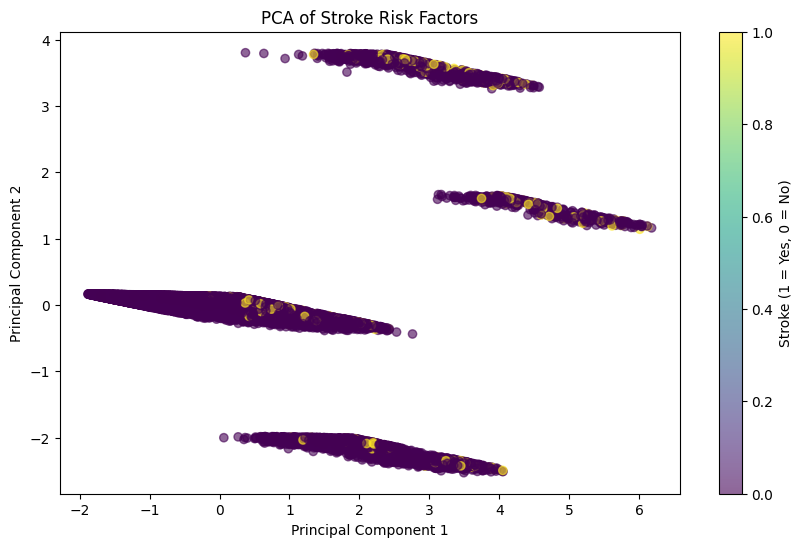

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features for PCA
# Removed 'avg_glucose_k', 'hmi' and replaced with 'avg_glucose_level'
numerical_features = ['age', 'avg_glucose_level', 'hypertension', 'heart_disease']
X = df[numerical_features]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Plot the results
plt.figure(figsize=(10, 6))
# Assuming 'stroke' is the target variable, replace 'dystroke' with 'stroke'
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['stroke'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Stroke (1 = Yes, 0 = No)')
plt.title('PCA of Stroke Risk Factors')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# K-Means Clustering

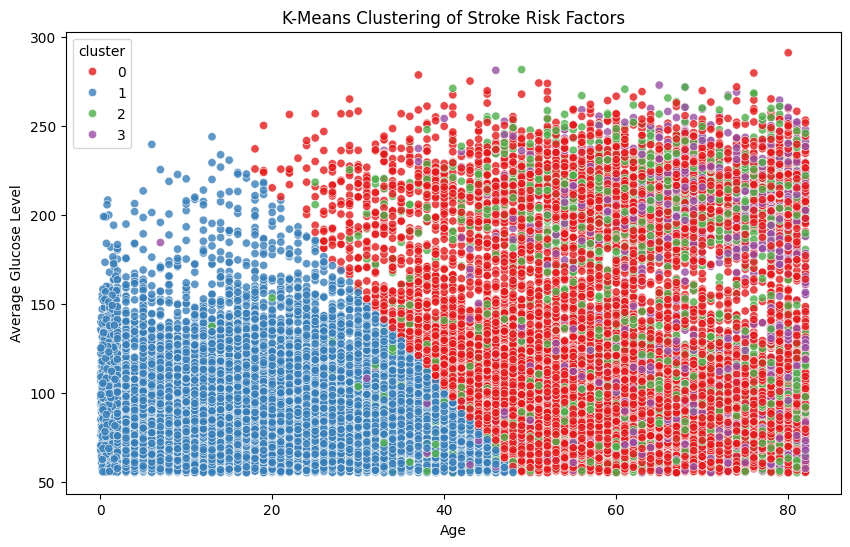

In [34]:
from sklearn.cluster import KMeans

# Select features for clustering
# Remove 'avg_glucose_k' and 'hmi' as they are not in the DataFrame
X = df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level']]  # Replace 'avg_glucose_k' with 'avg_glucose_level' if that's the intended feature

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)  # Adjust the number of clusters as needed
df['cluster'] = kmeans.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
# Replace 'avg_glucose_k' with 'avg_glucose_level' in the scatterplot
sns.scatterplot(x='age', y='avg_glucose_level', hue='cluster', data=df, palette='Set1', alpha=0.8)
plt.title('K-Means Clustering of Stroke Risk Factors')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

#Decision Tree for Feature Importance

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import plotly.express as px
# Prepare data
# Replace incorrect column names with correct ones
X = df[['age', 'avg_glucose_level', 'hypertension', 'heart_disease', 'smoking_status', 'Residence_type']]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical variables to dummy variables
# If 'dystroke' is the correct target variable name, keep it as is. If it's a typo, change it to the correct name (e.g., 'stroke')
y = df['stroke']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a decision tree
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Plot the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=['No Stroke', 'Stroke'], filled=True, rounded=True)
plt.title('Decision Tree for Stroke Prediction')
plt.show()
# For example, you can create an interactive scatter plot of age vs. avg_glucose_level colored by stroke status
if 'stroke' in df.columns:
    fig = px.scatter(df, x='age', y='avg_glucose_level', color='stroke', title='Age vs. Avg Glucose Level (Colored by Stroke Status)')
    fig.show()

#Random Forest for Feature Importance

<ipython-input-36-a9ab7531b556>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




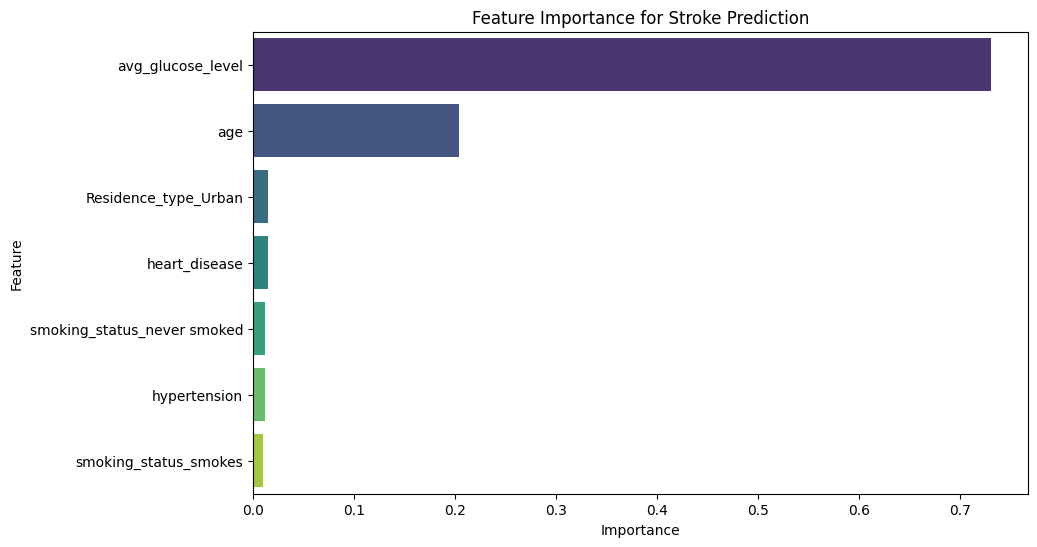

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Train a random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance for Stroke Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

#SHAP Values for Interpretable Machine Learning

In [ ]:
import shap

# Explain the model using SHAP
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test, feature_names=X.columns)

#Partial Dependence Plots

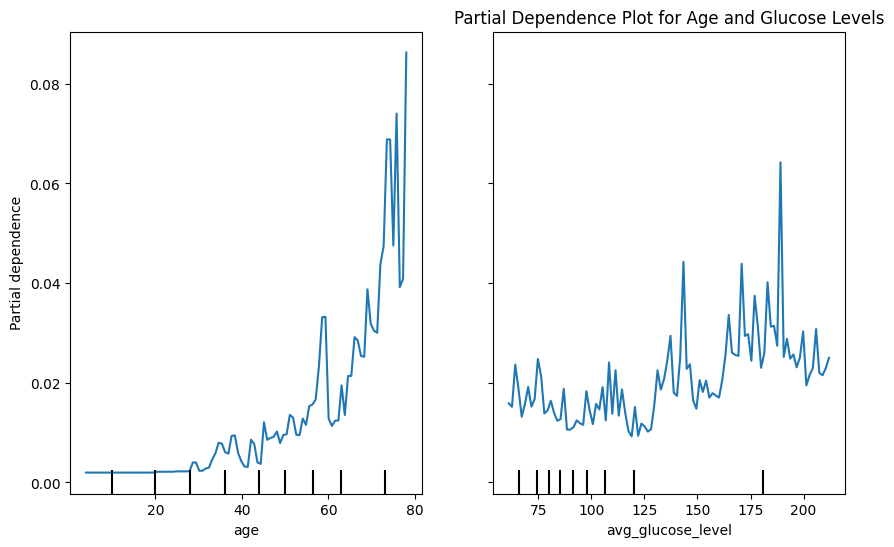

In [37]:
from sklearn.inspection import PartialDependenceDisplay

# Plot partial dependence for age and glucose levels
fig, ax = plt.subplots(figsize=(10, 6))
# Replace 'avg_glucose_k' with 'avg_glucose_level' in the features list
PartialDependenceDisplay.from_estimator(rf, X_train, features=['age', 'avg_glucose_level'], ax=ax)
plt.title('Partial Dependence Plot for Age and Glucose Levels')
plt.show()

#Logistic Regression with Interaction Terms

In [38]:
import statsmodels.api as sm

# Create interaction terms using 'avg_glucose_level'
df['hypertension_glucose_interaction'] = df['hypertension'] * df['avg_glucose_level']

# Fit a logistic regression model with interaction terms
# Use 'avg_glucose_level' instead of 'avg_glucose_k'
X = df[['hypertension', 'avg_glucose_level', 'hypertension_glucose_interaction']]
X = sm.add_constant(X)  # Add intercept
# Assuming 'stroke' is the target variable, change 'dystroke' to 'stroke' if needed
y = df['stroke']

model = sm.Logit(y, X)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.086221
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 stroke   No. Observations:                43400
Model:                          Logit   Df Residuals:                    43396
Method:                           MLE   Df Model:                            3
Date:                Mon, 24 Mar 2025   Pseudo R-squ.:                 0.04534
Time:                        01:22:11   Log-Likelihood:                -3742.0
converged:                       True   LL-Null:                       -3919.7
Covariance Type:            nonrobust   LLR p-value:                 1.002e-76
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const                               -5.4071      0.103    -52.34

#DBSCAN Clustering

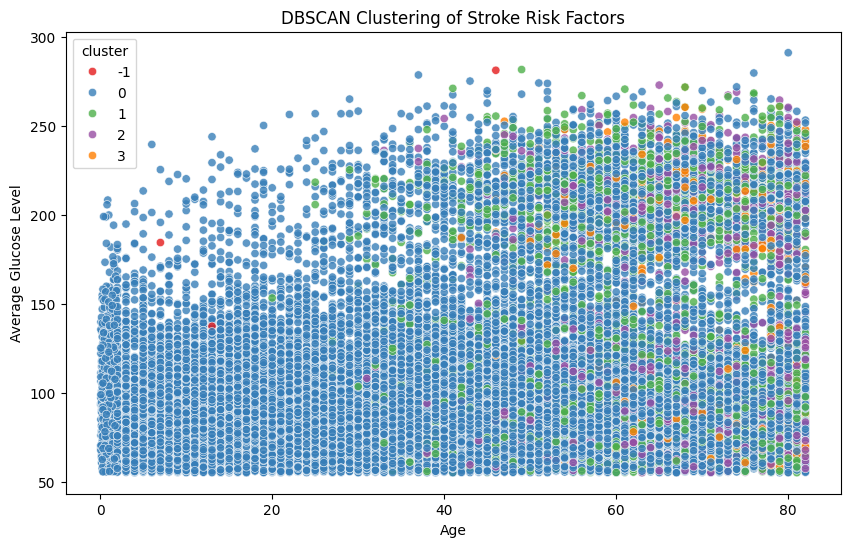

In [39]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Adjust parameters as needed
df['cluster'] = dbscan.fit_predict(X_scaled)

# Plot the clusters
plt.figure(figsize=(10, 6))
# Replace 'avg_glucose_k' with 'avg_glucose_level'
sns.scatterplot(x='age', y='avg_glucose_level', hue='cluster', data=df, palette='Set1', alpha=0.8)
plt.title('DBSCAN Clustering of Stroke Risk Factors')
plt.xlabel('Age')
plt.ylabel('Average Glucose Level')
plt.show()

#Logistic Regression with Polynomial Features

In [40]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

# Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Train a logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_poly, y)

# Get coefficients
coefficients = pd.DataFrame({'Feature': poly.get_feature_names_out(X.columns), 'Coefficient': log_reg.coef_[0]})
coefficients = coefficients.sort_values(by='Coefficient', ascending=False)

# Display top coefficients
print(coefficients.head(10))

                                              Feature   Coefficient
1                                        hypertension  6.628576e-01
5                                  const hypertension  6.628576e-01
8                                      hypertension^2  6.628576e-01
11                                avg_glucose_level^2  3.802419e-05
13                 hypertension_glucose_interaction^2 -2.442070e-07
12  avg_glucose_level hypertension_glucose_interac... -2.442070e-07
2                                   avg_glucose_level -4.347930e-04
6                             const avg_glucose_level -4.347930e-04
3                    hypertension_glucose_interaction -1.809008e-03
7              const hypertension_glucose_interaction -1.809008e-03


# Step 6: Correlation Analysis

#Handling Missing Valus

#Check Missing Values

In [49]:
# Function to calculate missing values percentage
def calculate_missing_values(data):
    # Exclude unwanted columns (e.g., 'bmi_bracket')
    columns_to_check = [col for col in data.columns if col != 'bmi_bracket']
    missing_values = data[columns_to_check].isnull().sum() / len(data) * 100
    return missing_values

# Function to print missing values information
def print_missing_values_info(missing_values, data):
    print("Missing Values Percentage:")
    print(missing_values)
    print("\nDetailed Missing Values:")
    print("# Missing values in variable 'bmi': {:.2f}%".format(missing_values['bmi']))
    print("# Missing values in variable 'smoking_status': {:.2f}%".format(missing_values['smoking_status']))
    print("Data shape: {}".format(data.shape))

# Main function to handle missing values
def handle_missing_values(data):
    # Calculate missing values
    missing_values = calculate_missing_values(data)

    # Print missing values information
    print_missing_values_info(missing_values, data)

    # Return the missing values for further use if needed
    return missing_values

# Example usage
if __name__ == "__main__":
    # Assuming 'df' is your DataFrame
    missing_values = handle_missing_values(df)

Missing Values Percentage:
id                                   0.000000
gender                               0.000000
age                                  0.000000
hypertension                         0.000000
heart_disease                        0.000000
ever_married                         0.000000
work_type                            0.000000
Residence_type                       0.000000
avg_glucose_level                    0.000000
bmi                                  3.368664
smoking_status                      30.626728
stroke                               0.000000
glucose_bracket                      0.000000
hypertension_glucose                 0.000000
age_glucose                          0.000000
hypertension_age                     0.000000
cluster                              0.000000
hypertension_glucose_interaction     0.000000
dtype: float64

Detailed Missing Values:
# Missing values in variable 'bmi': 3.37%
# Missing values in variable 'smoking_status': 30.63%
Data sha

In [41]:
# Function to calculate missing values percentage
def calculate_missing_values(data):
    # Calculate the percentage of missing values for each column
    missing_values = data.isnull().sum() / len(data) * 100
    return missing_values

# Function to print missing values information
def print_missing_values_info(missing_values, data):
    print("Missing Values Percentage:")
    print(missing_values)
    print("\nDetailed Missing Values:")
    print("# Missing values in variable 'bmi': {:.2f}%".format(missing_values['bmi']))
    print("# Missing values in variable 'smoking_status': {:.2f}%".format(missing_values['smoking_status']))
    print("Data shape: {}".format(data.shape))

# Main function to handle missing values
def handle_missing_values(data):
    # Calculate missing values
    missing_values = calculate_missing_values(data)

    # Print missing values information
    print_missing_values_info(missing_values, data)

    # Return the missing values for further use if needed
    return missing_values

# Example usage
if __name__ == "__main__":
    # Assuming 'df' is your DataFrame # Changed 'data' to 'df'
    missing_values = handle_missing_values(df) # Changed 'data' to 'df'

Missing Values Percentage:
id                                   0.000000
gender                               0.000000
age                                  0.000000
hypertension                         0.000000
heart_disease                        0.000000
ever_married                         0.000000
work_type                            0.000000
Residence_type                       0.000000
avg_glucose_level                    0.000000
bmi                                  3.368664
smoking_status                      30.626728
stroke                               0.000000
bmi_bracket                          3.368664
glucose_bracket                      0.000000
hypertension_glucose                 0.000000
age_glucose                          0.000000
hypertension_age                     0.000000
cluster                              0.000000
hypertension_glucose_interaction     0.000000
dtype: float64

Detailed Missing Values:
# Missing values in variable 'bmi': 3.37%
# Missing values

#Handling Missing Values

In [54]:
from sklearn.impute import SimpleImputer
# Create a copy of the DataFrame to avoid modifying the original
clean_data = df.copy()

# Drop rows with any missing values
clean_data.dropna(inplace=True)

# Create imputers for different strategies
bmi_imputer = SimpleImputer(strategy='mean')  # Impute 'bmi' with mean
smoking_imputer = SimpleImputer(strategy='most_frequent')  # Impute 'smoking_status' with mode

# Fit and transform the imputers on the respective columns
clean_data['bmi'] = bmi_imputer.fit_transform(clean_data[['bmi']])[:, 0]  # Get the first (and only) column of the 2D array
clean_data['smoking_status'] = smoking_imputer.fit_transform(clean_data[['smoking_status']])[:, 0]  # Get the first (and only) column of the 2D array


# Drop the 'id' column if needed
clean_data.drop(columns='id', axis=1, inplace=True)

# Validate that there are no more missing values
miss_val = clean_data.isnull().sum() / len(clean_data) * 100
print(miss_val)
print("# Missing values in variable 'bmi'\t\t: {}".format(miss_val['bmi']))
print("# Missing values in variable 'smoking_status'\t: {}".format(miss_val['smoking_status']))
print("Shape of data without missing values: {}".format(clean_data.shape))

gender                              0.0
age                                 0.0
hypertension                        0.0
heart_disease                       0.0
ever_married                        0.0
work_type                           0.0
Residence_type                      0.0
avg_glucose_level                   0.0
bmi                                 0.0
smoking_status                      0.0
stroke                              0.0
bmi_bracket                         0.0
glucose_bracket                     0.0
hypertension_glucose                0.0
age_glucose                         0.0
hypertension_age                    0.0
cluster                             0.0
hypertension_glucose_interaction    0.0
dtype: float64
# Missing values in variable 'bmi'		: 0.0
# Missing values in variable 'smoking_status'	: 0.0
Shape of data without missing values: (29072, 18)


### Changing Category to Numerical Values

#Feature Encoding:

In [55]:
# Display unique values in categorical columns
print(f"Unique 'gender'          : {df['gender'].unique()}")
print(f"Unique 'ever_married'    : {df['ever_married'].unique()}")
print(f"Unique 'work_type'       : {df['work_type'].unique()}")
print(f"Unique 'Residence_type'  : {df['Residence_type'].unique()}")
print(f"Unique 'smoking_status'  : {df['smoking_status'].unique()}")

Unique 'gender'          : ['Male' 'Female' 'Other']
Unique 'ever_married'    : ['No' 'Yes']
Unique 'work_type'       : ['children' 'Private' 'Never_worked' 'Self-employed' 'Govt_job']
Unique 'Residence_type'  : ['Rural' 'Urban']
Unique 'smoking_status'  : [nan 'never smoked' 'formerly smoked' 'smokes']


In [56]:
from sklearn.preprocessing import LabelEncoder

# Assuming clean_data is already created
# Initialize LabelEncoders for each categorical variable
le_gender = LabelEncoder()
le_married = LabelEncoder()
le_work = LabelEncoder()
le_residence = LabelEncoder()
le_smoking = LabelEncoder()

# Apply encoding with handling of NaN values by converting to string first
clean_data['gender'] = le_gender.fit_transform(clean_data['gender'].astype(str))
clean_data['ever_married'] = le_married.fit_transform(clean_data['ever_married'].astype(str))
clean_data['work_type'] = le_work.fit_transform(clean_data['work_type'].astype(str))
clean_data['Residence_type'] = le_residence.fit_transform(clean_data['Residence_type'].astype(str))
clean_data['smoking_status'] = le_smoking.fit_transform(clean_data['smoking_status'].astype(str))

# Display the first few rows with modified printing options
with pd.option_context('expand_frame_repr', False, 'display.max_columns', None):
    print("\nFirst 5 rows of encoded data:")
    print(clean_data.head())

# Optional: Print the mapping of original categories to encoded values
print("\nCategory mappings:")
print("Gender:", dict(zip(le_gender.classes_, range(len(le_gender.classes_)))))
print("Ever Married:", dict(zip(le_married.classes_, range(len(le_married.classes_)))))
print("Work Type:", dict(zip(le_work.classes_, range(len(le_work.classes_)))))
print("Residence Type:", dict(zip(le_residence.classes_, range(len(le_residence.classes_)))))
print("Smoking Status:", dict(zip(le_smoking.classes_, range(len(le_smoking.classes_)))))


First 5 rows of encoded data:
   gender   age  hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level   bmi  smoking_status  stroke  bmi_bracket glucose_bracket  hypertension_glucose  age_glucose  hypertension_age  cluster  hypertension_glucose_interaction
1       1  58.0             1              0             1          2               1              87.96  39.2               1       0        Obese          Normal                 87.96      5101.68              58.0        1                             87.96
3       0  70.0             0              0             1          2               0              69.04  35.9               0       0        Obese          Normal                  0.00      4832.80               0.0        0                              0.00
6       0  52.0             0              0             1          2               1              77.59  17.7               0       0  Underweight          Normal                  0.00    

### Inter-feature Correlation

In [59]:
# Calculate correlation matrix for numerical features only
numerical_features = clean_data.select_dtypes(include=np.number).columns
corr_matrix = clean_data[numerical_features].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))  # Slightly larger figure size
sns.heatmap(
    corr_matrix,
    annot=True,           # Show correlation values
    cmap='coolwarm',      # Use a diverging color scheme
    center=0,            # Center the colormap at 0
    vmin=-1,             # Minimum correlation value
    vmax=1,              # Maximum correlation value
    fmt='.2f',           # Format annotation with 2 decimal places
    square=True,         # Make the plot square-shaped
    linewidths=0.5,      # Add lines between cells
    cbar_kws={'label': 'Correlation Coefficient'}  # Customize colorbar
)

# Customize the plot
plt.title('Inter-feature Correlation Matrix', pad=20, fontsize=14)
plt.xticks(
    range(len(numerical_features)),  # Use numerical_features for x-axis
    numerical_features,             # Use numerical_features for x-axis labels
    rotation=45,
    ha='right',  # Right-align rotated labels
    fontsize=10
)
plt.yticks(
    range(len(numerical_features)),  # Use numerical_features for y-axis
    numerical_features,             # Use numerical_features for y-axis labels
    rotation=0,
    fontsize=10
)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Histogram of Features

In [60]:
# Set style for better visualization
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')  # Modern Seaborn style

# Number of features
n_features = len(clean_data.columns)
n_cols = 3  # Number of columns in the subplot grid
n_rows = (n_features + n_cols - 1) // n_cols  # Calculate required rows

# Create figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Histograms of All Features in Clean Data', fontsize=16, y=1.02)

# Flatten axes array for easier iteration (in case of multiple rows)
axes = axes.flatten()

# Iterate through each column and create histogram
for idx, column in enumerate(clean_data.columns):
    # Select the current axis
    ax = axes[idx]

    # Create histogram with KDE (kernel density estimate)
    sns.histplot(
        data=clean_data[column],
        bins=30,           # Number of bins
        kde=True,         # Add density curve
        color='skyblue',  # Bar color
        edgecolor='black',# Bar edge color
        ax=ax
    )

    # Customize each subplot
    ax.set_title(f'{column}', fontsize=12)
    ax.set_xlabel('Value' if clean_data[column].dtype in ['int64', 'float64'] else 'Category', fontsize=10)
    ax.set_ylabel('Frequency', fontsize=10)

    # Rotate x-axis labels for categorical variables
    if clean_data[column].dtype not in ['int64', 'float64']:
        ax.tick_params(axis='x', rotation=45)

# Remove empty subplots if any
for idx in range(n_features, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

### Class (Target) Distribution
Now, let's take a look at the distribution of class (target). If the class is highly imbalanced, we have to solve this issue so that our model will not be biased towards the majority class.

Class Distribution (Counts):
stroke
0    28524
1      548
Name: count, dtype: int64

Class Distribution (Percentages):
stroke
0    98.12
1     1.88
Name: proportion, dtype: float64


<ipython-input-61-1c51f5617e7a>:22: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




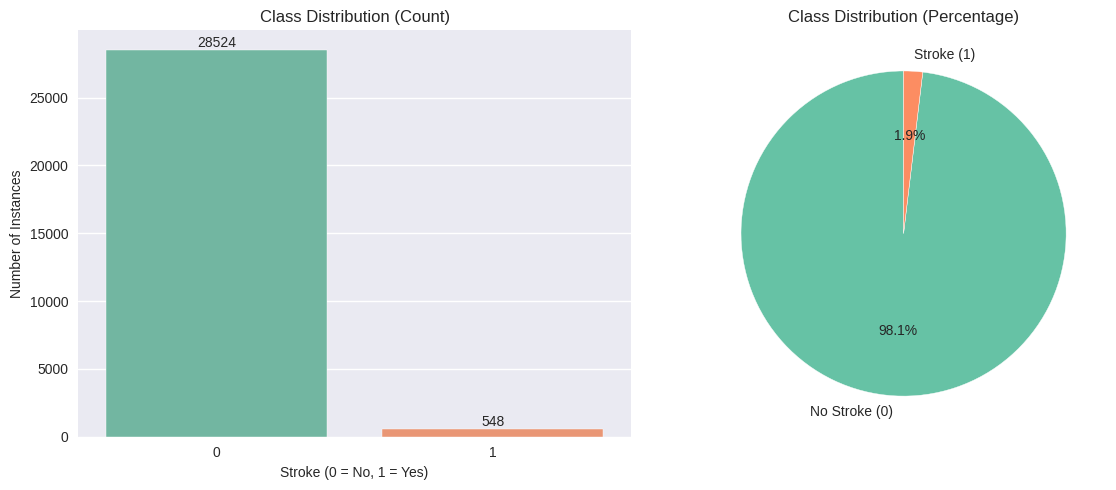


Imbalance Ratio (No Stroke / Stroke): 52.05


In [61]:
from collections import Counter

# Assuming clean_data is your DataFrame with 'stroke' as the target
# Set visualization style
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')

# Calculate class distribution
class_counts = clean_data['stroke'].value_counts()
class_percentages = clean_data['stroke'].value_counts(normalize=True) * 100

# Print class distribution
print("Class Distribution (Counts):")
print(class_counts)
print("\nClass Distribution (Percentages):")
print(class_percentages.round(2))

# Create figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
sns.countplot(x='stroke', data=clean_data, ax=ax1, palette='Set2')
ax1.set_title('Class Distribution (Count)', fontsize=12)
ax1.set_xlabel('Stroke (0 = No, 1 = Yes)', fontsize=10)
ax1.set_ylabel('Number of Instances', fontsize=10)
for p in ax1.patches:  # Add count labels on bars
    ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom')

# Pie chart
ax2.pie(class_counts,
        labels=['No Stroke (0)', 'Stroke (1)'],
        autopct='%1.1f%%',
        colors=sns.color_palette('Set2'),
        startangle=90)
ax2.set_title('Class Distribution (Percentage)', fontsize=12)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Check for imbalance
imbalance_ratio = class_counts[0] / class_counts[1] if class_counts[1] != 0 else float('inf')
print(f"\nImbalance Ratio (No Stroke / Stroke): {imbalance_ratio:.2f}")

# Basic imbalance assessment
if imbalance_ratio > 10:
    print("Warning: Highly imbalanced dataset detected. Consider handling imbalance.")
elif imbalance_ratio > 3:
    print("Note: Moderately imbalanced dataset. May benefit from imbalance handling.")
else:
    print("Class distribution appears relatively balanced.")

## Data Preprocessing

In [64]:
from imblearn.over_sampling import ADASYN

# Create ADASYN object with sampling strategy for minority class
adasyn = ADASYN(sampling_strategy='minority', random_state=42)

# Fit and resample the data
X, y = adasyn.fit_resample(
    clean_data.loc[:, clean_data.columns != 'stroke'],
    clean_data['stroke']
)

# Print shapes
print("Shape of X: {}".format(X.shape))
print("Shape of y: {}".format(y.shape))

# Optional: Convert X back to DataFrame and check distribution
X_df = pd.DataFrame(X, columns=clean_data.columns.drop('stroke'))
print("\nNew class distribution:")
print(pd.Series(y).value_counts())

ValueError: could not convert string to float: 'Obese'

In [65]:
!pip install -U imbalanced-learn scikit-learn

import pandas as pd
from imblearn.over_sampling import ADASYN
from sklearn.preprocessing import LabelEncoder

# Assuming 'clean_data' is your DataFrame

# Create a copy to avoid modifying the original DataFrame
encoded_data = clean_data.copy()

# List of categorical columns to encode
categorical_cols = ['bmi_bracket', 'glucose_bracket', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Initialize and apply LabelEncoder for each categorical column
for col in categorical_cols:
    le = LabelEncoder()
    encoded_data[col] = le.fit_transform(encoded_data[col].astype(str))

# Create ADASYN object
adasyn = ADASYN(sampling_strategy='minority', random_state=42)

# Fit and resample the encoded data
X, y = adasyn.fit_resample(
    encoded_data.loc[:, encoded_data.columns != 'stroke'],  # Features (exclude target)
    encoded_data['stroke']  # Target
)

# Print shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Optional: Convert X back to DataFrame and check distribution
X_df = pd.DataFrame(X, columns=encoded_data.columns.drop('stroke'))
print("\nNew class distribution:")
print(pd.Series(y).value_counts())

Shape of X: (56890, 17)
Shape of y: (56890,)

New class distribution:
stroke
0    28524
1    28366
Name: count, dtype: int64


In [66]:
# Assuming X and y are your resampled data from ADASYN
# If you're checking original clean_data instead, replace y with clean_data['stroke']

# Convert y to Series if it's not already (from ADASYN output)
y_series = pd.Series(y, name='stroke')

# Calculate class distribution
class_counts = y_series.value_counts()
class_percentages = y_series.value_counts(normalize=True) * 100

# Print distribution
print("Class Distribution (Counts):")
print(class_counts)
print("\nClass Distribution (Percentages):")
print(class_percentages.round(2))

# Set visualization style
sns.set_style("whitegrid")
plt.style.use('seaborn-v0_8')

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

# Bar plot
sns.countplot(x=y_series, ax=ax1, palette='Pastel1')
ax1.set_title('Class Distribution (Count)', fontsize=12)
ax1.set_xlabel('Stroke (0 = No, 1 = Yes)', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
for p in ax1.patches:
    ax1.annotate(f'{int(p.get_height())}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom', fontsize=10)

# Pie chart
ax2.pie(class_counts,
        labels=['No Stroke (0)', 'Stroke (1)'],
        autopct='%1.1f%%',
        colors=sns.color_palette('Pastel1'),
        startangle=90,
        explode=(0, 0.1))  # Slightly separate the minority class
ax2.set_title('Class Distribution (Percentage)', fontsize=12)

# Display the plot
plt.show()

# Calculate and print imbalance ratio
imbalance_ratio = class_counts[0] / class_counts[1] if class_counts[1] != 0 else float('inf')
print(f"Imbalance Ratio (No Stroke / Stroke): {imbalance_ratio:.2f}")

Class Distribution (Counts):
stroke
0    28524
1    28366
Name: count, dtype: int64

Class Distribution (Percentages):
stroke
0    50.14
1    49.86
Name: proportion, dtype: float64


<ipython-input-66-d798743d7eca>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Imbalance Ratio (No Stroke / Stroke): 1.01


### Data Splitting

In [67]:
from sklearn.model_selection import train_test_split

# Assuming X and y are from your ADASYN resampling
# Convert X to DataFrame if it's not already (for clarity)
X_df = pd.DataFrame(X, columns=clean_data.columns.drop('stroke'))
y_series = pd.Series(y, name='stroke')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_df,              # Features
    y_series,          # Target
    test_size=0.2,     # 20% for testing
    train_size=0.8,    # 80% for training
    random_state=42,   # For reproducibility
    stratify=y_series  # Maintain class distribution in split
)

# Print shapes of resulting sets
print("Data Split Summary:")
print(f"Original data shape: {X_df.shape}")
print(f"Training set shape (X_train): {X_train.shape}")
print(f"Testing set shape (X_test): {X_test.shape}")
print(f"Training target shape (y_train): {y_train.shape}")
print(f"Testing target shape (y_test): {y_test.shape}")

# Verify class distribution in train and test sets
print("\nClass Distribution in Training Set:")
print(y_train.value_counts(normalize=True).round(2) * 100)
print("\nClass Distribution in Testing Set:")
print(y_test.value_counts(normalize=True).round(2) * 100)

# Optional: Reset indices for cleanliness
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Data Split Summary:
Original data shape: (56890, 17)
Training set shape (X_train): (45512, 17)
Testing set shape (X_test): (11378, 17)
Training target shape (y_train): (45512,)
Testing target shape (y_test): (11378,)

Class Distribution in Training Set:
stroke
0    50.0
1    50.0
Name: proportion, dtype: float64

Class Distribution in Testing Set:
stroke
0    50.0
1    50.0
Name: proportion, dtype: float64


### Data Normalisation

In [68]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train, X_test, y_train, y_test are from your previous split
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train_scaled = scaler.fit_transform(X_train)
# Transform test data using the same scaler (fitted on training data only)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames for convenience
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Print basic statistics to verify scaling
print("Training Set Statistics After Scaling:")
print(X_train_scaled_df.describe().round(2))
print("\nTesting Set Statistics After Scaling:")
print(X_test_scaled_df.describe().round(2))

# Optional: Check a few rows
print("\nFirst 5 rows of scaled training data:")
print(X_train_scaled_df.head())

Training Set Statistics After Scaling:
         gender       age  hypertension  heart_disease  ever_married  \
count  45512.00  45512.00      45512.00       45512.00      45512.00   
mean      -0.00      0.00          0.00          -0.00         -0.00   
std        1.00      1.00          1.00           1.00          1.00   
min       -0.64     -2.59         -0.43          -0.24         -1.87   
25%       -0.64     -0.69         -0.43          -0.24          0.54   
50%       -0.64      0.22         -0.43          -0.24          0.54   
75%        1.57      0.87         -0.43          -0.24          0.54   
max        3.78      1.30          2.33           4.13          0.54   

       work_type  Residence_type  avg_glucose_level       bmi  smoking_status  \
count   45512.00        45512.00           45512.00  45512.00        45512.00   
mean        0.00           -0.00              -0.00     -0.00            0.00   
std         1.00            1.00               1.00      1.00        

## ML Model Training and Evaluation
We will implement and benchmark the performance of the following 7 ML algorithms:
1. Logistic Regression (LR)
2. Decision Tree (DT)
1. Random Forest (RF)
2. LightGBM (LGBM)
3. XGboost (XGB)
4. Catboost (CAT)

### Performance Metrics

The peformance will be evaluated based on two different groups of metrics:
1. Sensitivity, specificity,area under the curve (AUC),ROC Curve
2. Precision, recall, and F1 score

# #Random Forest

In [59]:
from sklearn.ensemble import RandomForestClassifier
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled_df, y_train)

# Predictions and probabilities
y_pred = rf_model.predict(X_test_scaled_df)
y_prob = rf_model.predict_proba(X_test_scaled_df)[:, 1]  # Probability for positive class

# --- Group 1: Sensitivity, Specificity, AUC, ROC Curve ---

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)  # True Positive Rate (Recall)
specificity = tn / (tn + fp)  # True Negative Rate

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print Group 1 metrics
print("Random Forest - Group 1 Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Random Forest - Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Group 2: Precision, Recall, F1 Score ---

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Same as sensitivity
f1 = f1_score(y_test, y_pred)

# Print Group 2 metrics
print("\nRandom Forest - Group 2 Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            xticklabels=['No Stroke (0)', 'Stroke (1)'],
            yticklabels=['No Stroke (0)', 'Stroke (1)'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Random Forest - Confusion Matrix', fontsize=14)
plt.show()

# Optional: Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

Random Forest - Group 1 Metrics:
Sensitivity (Recall): 0.9840
Specificity: 0.9649
AUC: 0.9971



Random Forest - Group 2 Metrics:
Precision: 0.9654
Recall: 0.9840
F1 Score: 0.9746



Feature Importance:
                             Feature  Importance
1                                age    0.281185
13                       age_glucose    0.197412
8                                bmi    0.092510
7                  avg_glucose_level    0.086551
9                     smoking_status    0.045371
5                          work_type    0.042590
10                       bmi_bracket    0.037598
6                     Residence_type    0.034357
0                             gender    0.028785
15                           cluster    0.026454
11                   glucose_bracket    0.025782
12              hypertension_glucose    0.024749
16  hypertension_glucose_interaction    0.024081
14                  hypertension_age    0.022627
4                       ever_married    0.016044
2                       hypertension    0.008152
3                      heart_disease    0.005752


LightGBM - Group 1 Metrics:
Sensitivity (Recall): 0.9588
Specificity: 0.9835
AUC: 0.9942


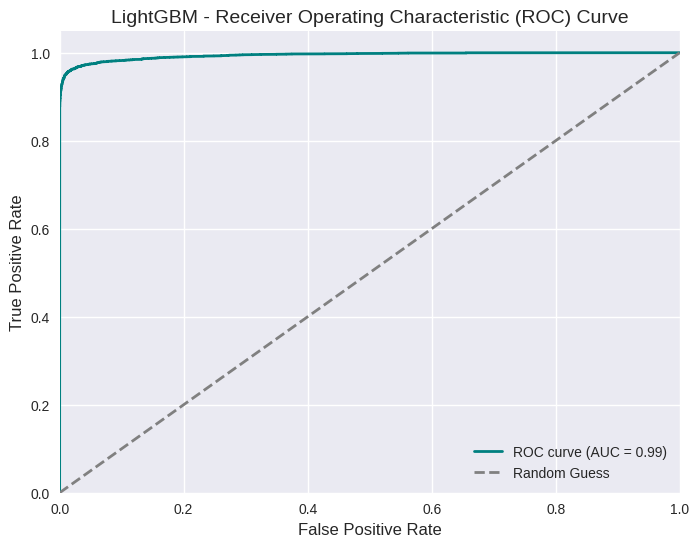


LightGBM - Group 2 Metrics:
Precision: 0.9830
Recall: 0.9588
F1 Score: 0.9707


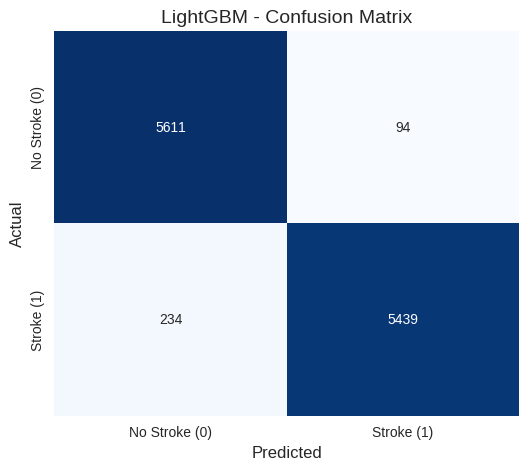


Feature Importance:
                             Feature  Importance
1                                age        1159
13                       age_glucose         454
8                                bmi         331
7                  avg_glucose_level         202
10                       bmi_bracket         143
5                          work_type         136
9                     smoking_status          84
12              hypertension_glucose          78
4                       ever_married          72
11                   glucose_bracket          69
0                             gender          60
6                     Residence_type          58
2                       hypertension          42
15                           cluster          42
3                      heart_disease          36
14                  hypertension_age          34
16  hypertension_glucose_interaction           0


In [53]:
import lightgbm as lgb
# Train LightGBM model
lgbm_model = lgb.LGBMClassifier(
    n_estimators=100,      # Number of boosting iterations
    learning_rate=0.1,     # Step size
    random_state=42,       # For reproducibility
    verbose=-1             # Suppress training output
)
lgbm_model.fit(X_train_scaled_df, y_train)

# Predictions and probabilities
y_pred = lgbm_model.predict(X_test_scaled_df)
y_prob = lgbm_model.predict_proba(X_test_scaled_df)[:, 1]  # Probability for positive class

# --- Group 1: Sensitivity, Specificity, AUC, ROC Curve ---

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)  # True Positive Rate (Recall)
specificity = tn / (tn + fp)  # True Negative Rate

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print Group 1 metrics
print("LightGBM - Group 1 Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='teal', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('LightGBM - Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Group 2: Precision, Recall, F1 Score ---

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Same as sensitivity
f1 = f1_score(y_test, y_pred)

# Print Group 2 metrics
print("\nLightGBM - Group 2 Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke (0)', 'Stroke (1)'],
            yticklabels=['No Stroke (0)', 'Stroke (1)'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('LightGBM - Confusion Matrix', fontsize=14)
plt.show()

# Optional: Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': lgbm_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

#XGBOOST

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[00:13:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




XGBoost - Group 1 Metrics:
Sensitivity (Recall): 0.9392
Specificity: 0.9171
AUC: 0.9838


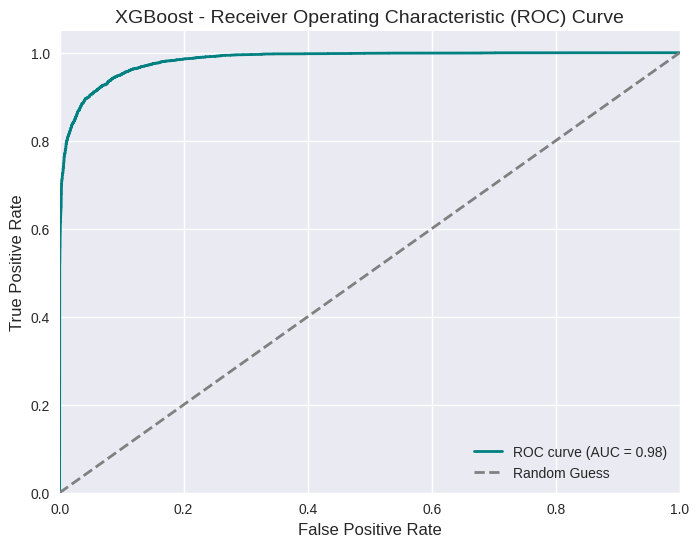


XGBoost - Group 2 Metrics:
Precision: 0.9185
Recall: 0.9392
F1 Score: 0.9287



Feature Importance:
                             Feature  Importance
1                                age    0.200792
11                   glucose_bracket    0.096271
0                             gender    0.095621
6                     Residence_type    0.083943
10                       bmi_bracket    0.073228
5                          work_type    0.072406
9                     smoking_status    0.062735
2                       hypertension    0.052953
3                      heart_disease    0.049959
8                                bmi    0.044593
4                       ever_married    0.042092
14                  hypertension_age    0.032369
15                           cluster    0.026249
13                       age_glucose    0.024435
7                  avg_glucose_level    0.021351
12              hypertension_glucose    0.021003
16  hypertension_glucose_interaction    0.000000


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix,
    precision_score, recall_score, f1_score,
    roc_auc_score
)
import seaborn as sns
import numpy as np

# Train XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,      # Number of boosting iterations
    learning_rate=0.1,     # Step size
    random_state=42,       # For reproducibility
    eval_metric='logloss', # Evaluation metric
    use_label_encoder=False # Suppress warning
)
xgb_model.fit(X_train_scaled_df, y_train)

# Predictions and probabilities
y_pred = xgb_model.predict(X_test_scaled_df)
y_prob = xgb_model.predict_proba(X_test_scaled_df)[:, 1]  # Probability for positive class

# --- Group 1: Sensitivity, Specificity, AUC, ROC Curve ---

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)  # True Positive Rate (Recall)
specificity = tn / (tn + fp)  # True Negative Rate

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print Group 1 metrics
print("XGBoost - Group 1 Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='teal', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('XGBoost - Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Group 2: Precision, Recall, F1 Score ---

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Same as sensitivity
f1 = f1_score(y_test, y_pred)

# Print Group 2 metrics
print("\nXGBoost - Group 2 Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke (0)', 'Stroke (1)'],
            yticklabels=['No Stroke (0)', 'Stroke (1)'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('XGBoost - Confusion Matrix', fontsize=14)
plt.show()

# Optional: Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

#Logistic Regression (LR)


Logistic Regression - Group 1 Metrics:
Sensitivity (Recall): 0.8243
Specificity: 0.8079
AUC: 0.9077



Logistic Regression - Group 2 Metrics:
Precision: 0.8101
Recall: 0.8243
F1 Score: 0.8171


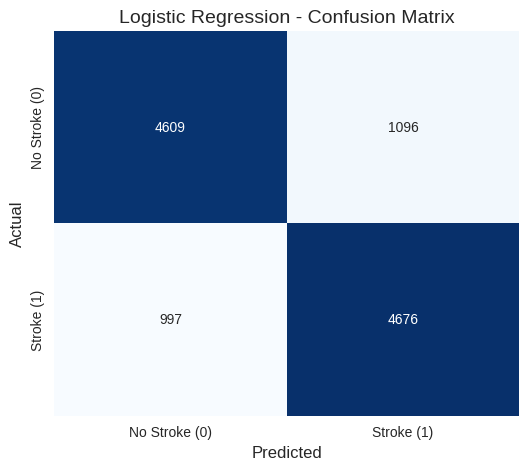


Feature Coefficients:
                             Feature  Coefficient
15                           cluster     3.962438
1                                age     1.884339
14                  hypertension_age     1.092880
7                  avg_glucose_level     0.196999
16  hypertension_glucose_interaction     0.115340
12              hypertension_glucose     0.115340
8                                bmi     0.047934
5                          work_type    -0.344580
4                       ever_married    -0.345035
10                       bmi_bracket    -0.354349
9                     smoking_status    -0.429026
6                     Residence_type    -0.478788
0                             gender    -0.478818
11                   glucose_bracket    -0.585671
13                       age_glucose    -0.629373
3                      heart_disease    -2.843450
2                       hypertension    -3.400054


In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix,
    precision_score, recall_score, f1_score,
    roc_auc_score
)
import seaborn as sns
import numpy as np

# Train Logistic Regression model
lr_model = LogisticRegression(
    random_state=42,       # For reproducibility
    max_iter=1000,         # Increase iterations for convergence
    class_weight='balanced' # Handle class imbalance
)
lr_model.fit(X_train_scaled_df, y_train)

# Predictions and probabilities
y_pred = lr_model.predict(X_test_scaled_df)
y_prob = lr_model.predict_proba(X_test_scaled_df)[:, 1]  # Probability for positive class

# --- Group 1: Sensitivity, Specificity, AUC, ROC Curve ---

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)  # True Positive Rate (Recall)
specificity = tn / (tn + fp)  # True Negative Rate

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print Group 1 metrics
print("Logistic Regression - Group 1 Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='teal', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Logistic Regression - Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Group 2: Precision, Recall, F1 Score ---

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Same as sensitivity
f1 = f1_score(y_test, y_pred)

# Print Group 2 metrics
print("\nLogistic Regression - Group 2 Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke (0)', 'Stroke (1)'],
            yticklabels=['No Stroke (0)', 'Stroke (1)'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Logistic Regression - Confusion Matrix', fontsize=14)
plt.show()

# Optional: Feature Coefficients (Logistic Regression does not have feature importance)
feature_coefficients = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values('Coefficient', ascending=False)

print("\nFeature Coefficients:")
print(feature_coefficients)

#Decision Tree (DT)

Decision Tree - Group 1 Metrics:
Sensitivity (Recall): 0.8154
Specificity: 0.7748
AUC: 0.8638


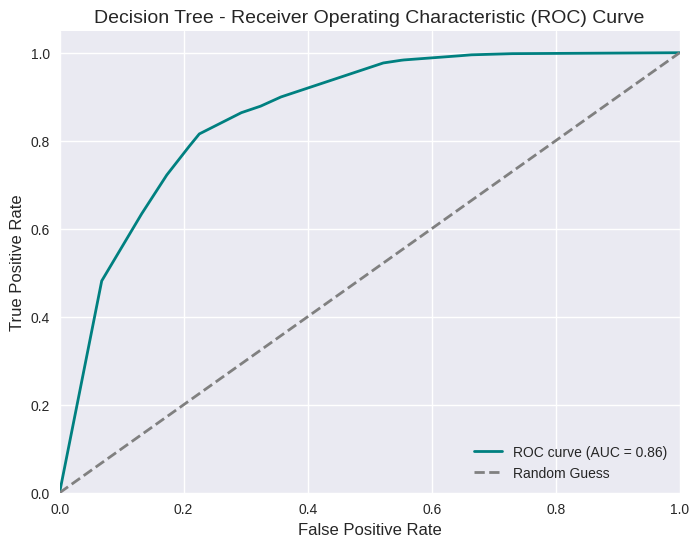


Decision Tree - Group 2 Metrics:
Precision: 0.7826
Recall: 0.8154
F1 Score: 0.7987


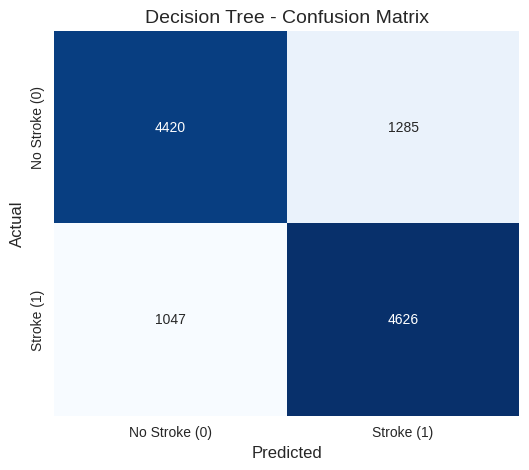


Feature Importance:
                             Feature  Importance
1                                age    0.808485
5                          work_type    0.055057
6                     Residence_type    0.052924
10                       bmi_bracket    0.038252
0                             gender    0.023033
14                  hypertension_age    0.021965
16  hypertension_glucose_interaction    0.000284
4                       ever_married    0.000000
2                       hypertension    0.000000
8                                bmi    0.000000
7                  avg_glucose_level    0.000000
3                      heart_disease    0.000000
9                     smoking_status    0.000000
12              hypertension_glucose    0.000000
11                   glucose_bracket    0.000000
13                       age_glucose    0.000000
15                           cluster    0.000000


In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix,
    precision_score, recall_score, f1_score,
    roc_auc_score
)
import seaborn as sns
import numpy as np

# Train Decision Tree model
dt_model = DecisionTreeClassifier(
    random_state=42,       # For reproducibility
    max_depth=4,           # Limit tree depth to prevent overfitting
    class_weight='balanced' # Handle class imbalance
)
dt_model.fit(X_train_scaled_df, y_train)

# Predictions and probabilities
y_pred = dt_model.predict(X_test_scaled_df)
y_prob = dt_model.predict_proba(X_test_scaled_df)[:, 1]  # Probability for positive class

# --- Group 1: Sensitivity, Specificity, AUC, ROC Curve ---

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
tn, fp, fn, tp = cm.ravel()

sensitivity = tp / (tp + fn)  # True Positive Rate (Recall)
specificity = tn / (tn + fp)  # True Negative Rate

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Print Group 1 metrics
print("Decision Tree - Group 1 Metrics:")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"AUC: {roc_auc:.4f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='teal', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Decision Tree - Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# --- Group 2: Precision, Recall, F1 Score ---

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)  # Same as sensitivity
f1 = f1_score(y_test, y_pred)

# Print Group 2 metrics
print("\nDecision Tree - Group 2 Metrics:")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

# Confusion Matrix Visualization
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Stroke (0)', 'Stroke (1)'],
            yticklabels=['No Stroke (0)', 'Stroke (1)'])
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('Actual', fontsize=12)
plt.title('Decision Tree - Confusion Matrix', fontsize=14)
plt.show()

# Optional: Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X_train_scaled_df.columns,
    'Importance': dt_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

#Performance Benchmark Across Models

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning:

[00:38:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.




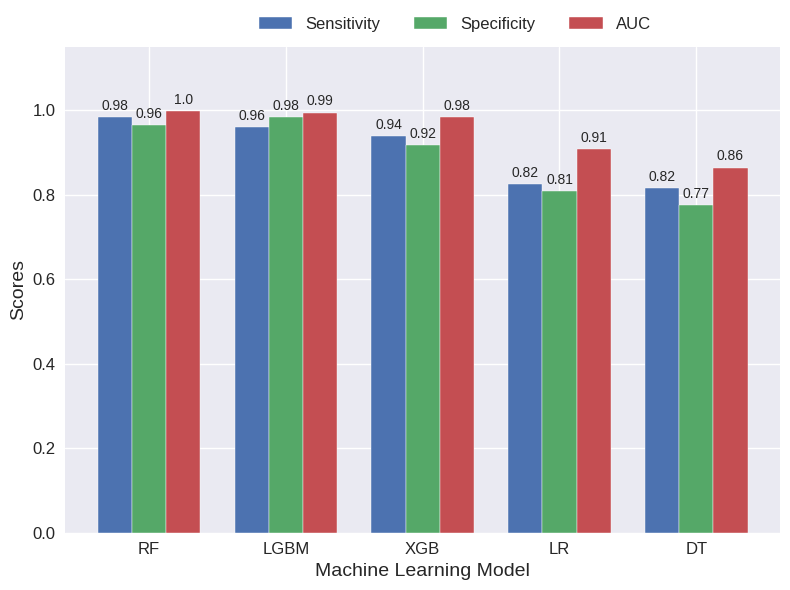

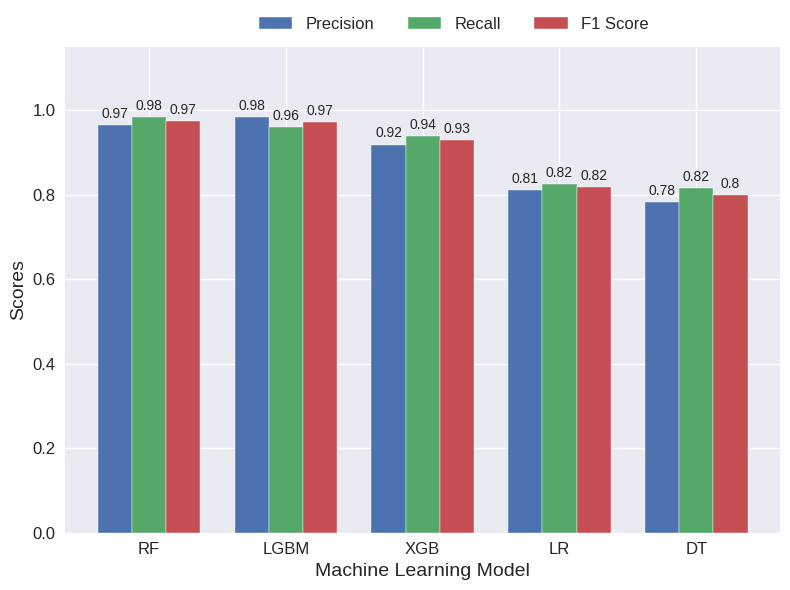

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    roc_curve, auc, confusion_matrix,
    precision_score, recall_score, f1_score,
    roc_auc_score
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
import xgboost as xgb

# Assuming you have X_train_scaled_df, y_train, X_test_scaled_df, y_test

# --- Model Training and Metric Calculation ---
def calculate_metrics(model, X_test, y_test):
    """Calculates and returns performance metrics for a given model."""
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    cm = confusion_matrix(y_test, y_pred)
    tn, fp, fn, tp = cm.ravel()

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    auc_score = roc_auc_score(y_test, y_prob)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    return sensitivity, specificity, auc_score, precision, recall, f1

# Train and evaluate each model
models = {
    'RF': RandomForestClassifier(n_estimators=100, random_state=42),
    'LGBM': lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, random_state=42, verbose=-1),
    'XGB': xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, eval_metric='logloss', use_label_encoder=False),
    'LR': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'DT': DecisionTreeClassifier(random_state=42, max_depth=4, class_weight='balanced')
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled_df, y_train)
    results[name] = calculate_metrics(model, X_test_scaled_df, y_test)

# --- Extract Metrics for Plotting ---
ml_names = list(models.keys())
sens_all = [results[name][0] for name in ml_names]
spec_all = [results[name][1] for name in ml_names]
auc_all = [results[name][2] for name in ml_names]
prec_all = [results[name][3] for name in ml_names]
rec_all = [results[name][4] for name in ml_names]
f1_all = [results[name][5] for name in ml_names]

# --- Plotting Functions ---
def autolabel(rects, ax):
    """Attach a text label above each bar in `rects`, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Plotting function
def plot_metrics(metrics, labels, title, ylabel, filename):
    """Plot bar charts for given metrics."""
    width = 0.25  # Width of the bars
    r1 = np.arange(len(ml_names))  # Label locations
    r2 = [x + width for x in r1]
    r3 = [x + width for x in r2]

    fig, ax = plt.subplots(figsize=(8, 6))
    bar1 = ax.bar(r1, metrics[0], width, label=labels[0])
    bar2 = ax.bar(r2, metrics[1], width, label=labels[1])
    bar3 = ax.bar(r3, metrics[2], width, label=labels[2])

    # Customize the plot
    ax.set_ylim([0, 1.15])
    ax.set_ylabel(ylabel, fontsize=14)
    ax.set_xticks(r2)
    ax.set_xticklabels(ml_names, fontsize=12)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.set_xlabel("Machine Learning Model", fontsize=14)
    ax.legend(loc='lower left', ncol=3, bbox_to_anchor=(0.25, 1), fontsize=12)

    # Add labels on bars
    autolabel(bar1, ax)
    autolabel(bar2, ax)
    autolabel(bar3, ax)

    # Save and show the plot
    fig.tight_layout()
    fig.savefig(filename, bbox_inches='tight')
    plt.show()

# Plot Sensitivity, Specificity, and AUC
plot_metrics(
    metrics=[sens_all, spec_all, auc_all],
    labels=['Sensitivity', 'Specificity', 'AUC'],
    title='Performance Metrics (Sensitivity, Specificity, AUC)',
    ylabel='Scores',
    filename="ml_benchmark_auc.pdf"
)

# Plot Precision, Recall, and F1 Score
plot_metrics(
    metrics=[prec_all, rec_all, f1_all],
    labels=['Precision', 'Recall', 'F1 Score'],
    title='Performance Metrics (Precision, Recall, F1 Score)',
    ylabel='Scores',
    filename="ml_benchmark_f1.pdf"
)

### Selecting Most Important Features

To evaluate the most important features, we will use feature importance score which can be calculated using two different methods as follows:
1. Tree based feature importance. This is calculated during the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees indicates higher relative importance. This can be access by using feature_importances_ attribute within the model.
2. Permutation based feature importance. First, we compute the baseline performance of the original trained model (without permutation) using the testing set; Second, for each feature, we permute the data in that feature, compute and record the performance based on the permuted data; lastly, compute the feature importance as the difference between the baseline performance and the performance based on the permuted data.

Random Forest - Tree-Based Feature Importance


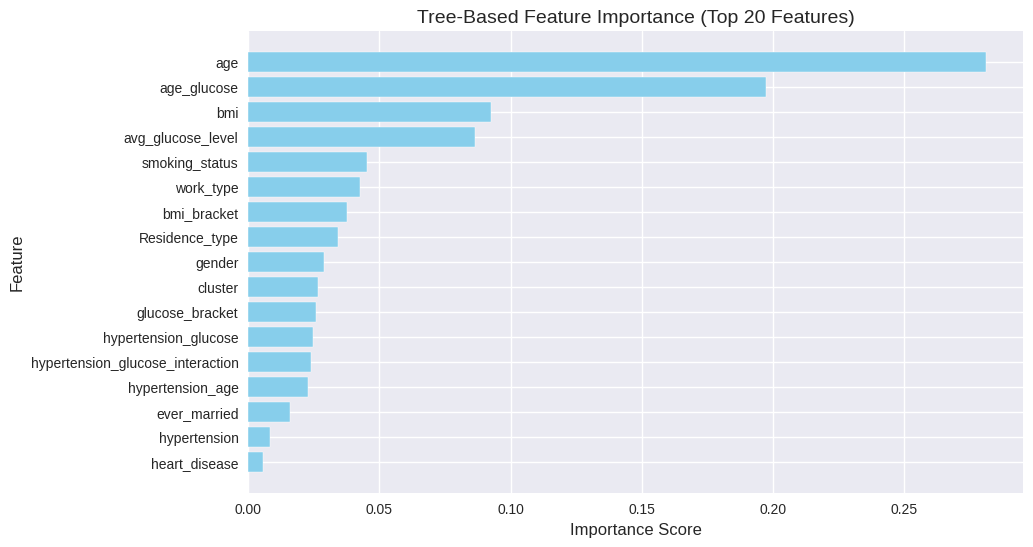

Random Forest - Permutation-Based Feature Importance


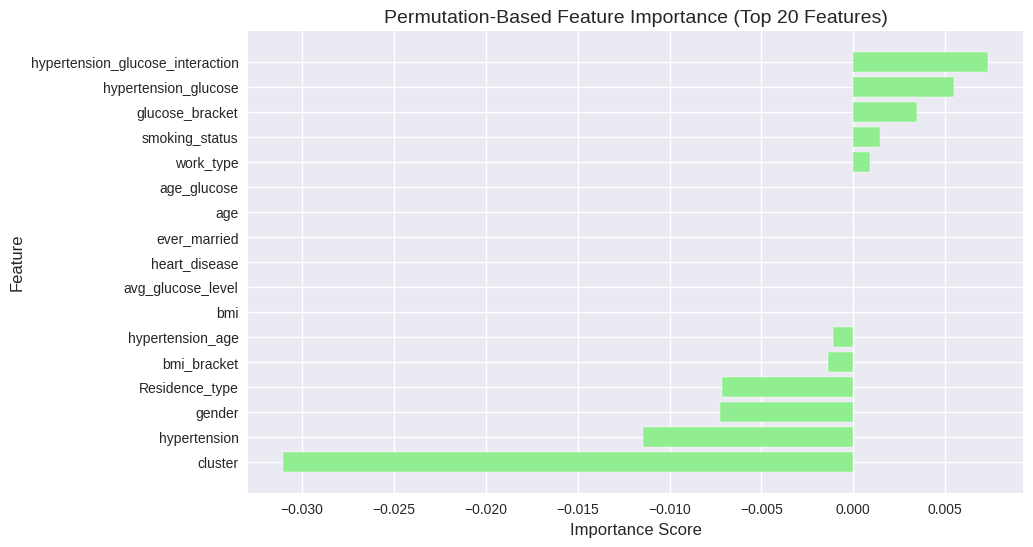

LightGBM - Tree-Based Feature Importance


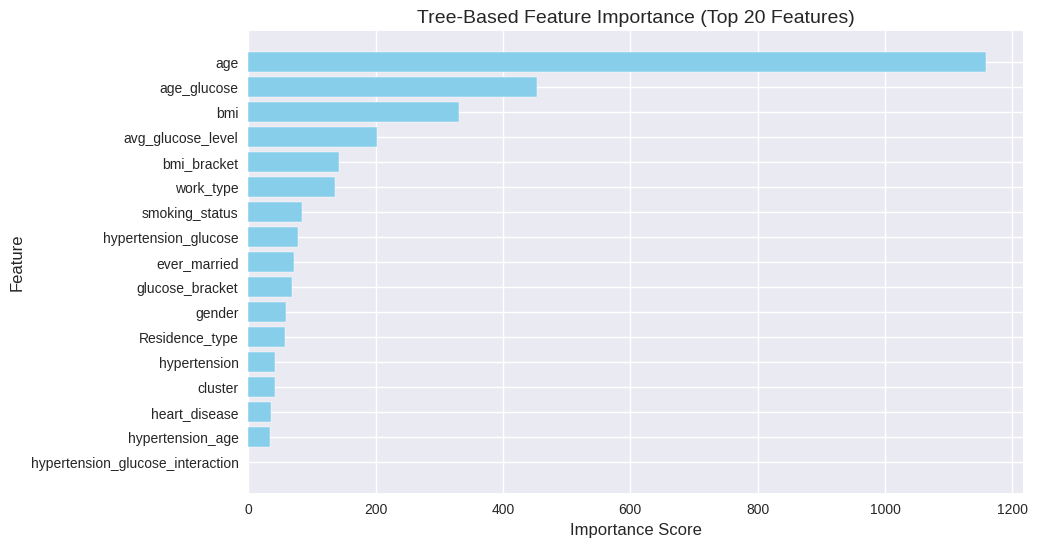

LightGBM - Permutation-Based Feature Importance


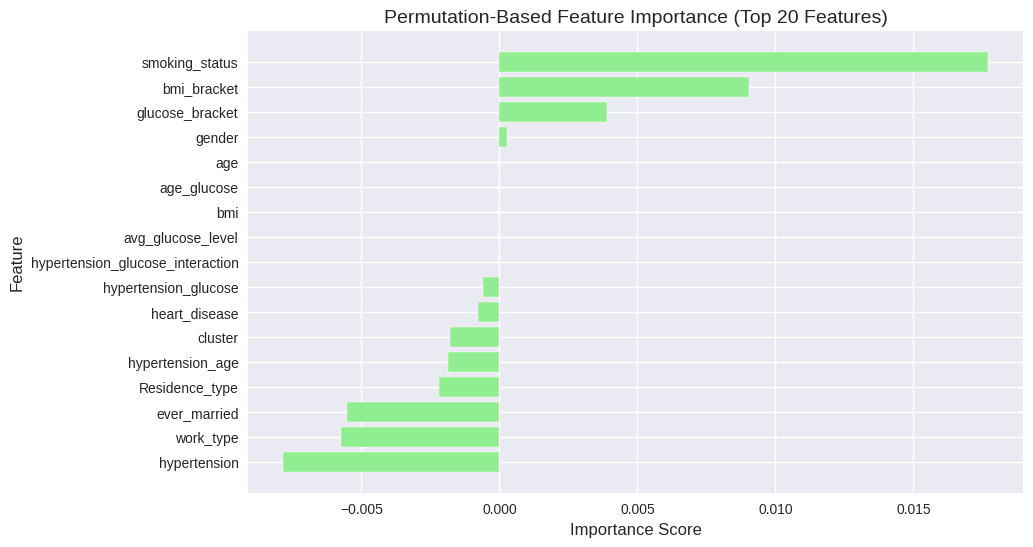

XGBoost - Tree-Based Feature Importance


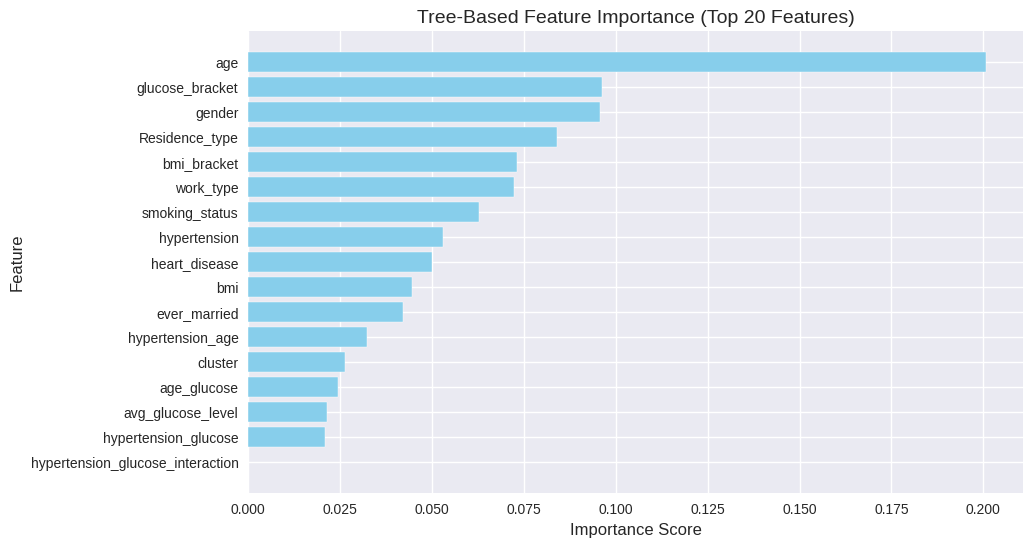

XGBoost - Permutation-Based Feature Importance


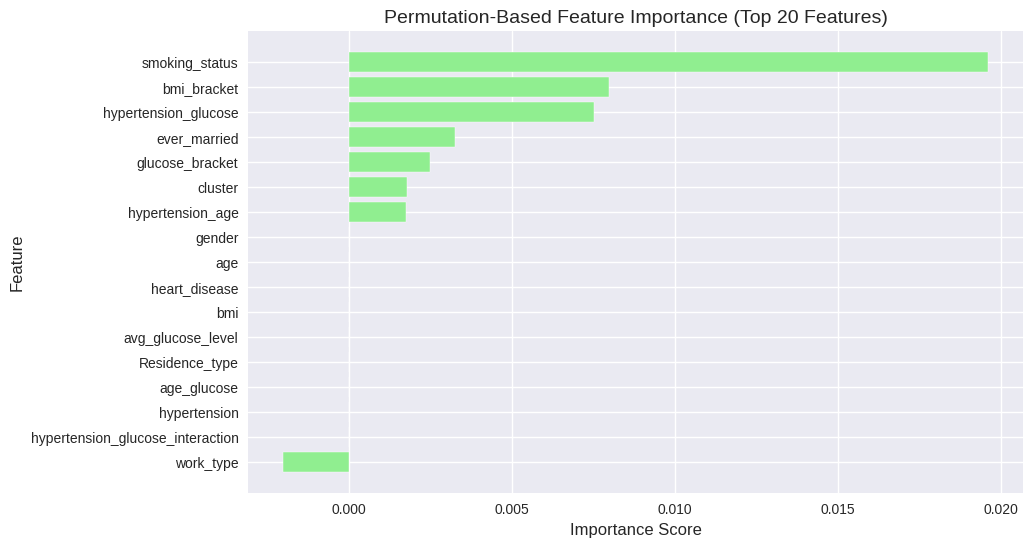

Logistic Regression - Feature Importance (Coefficients)


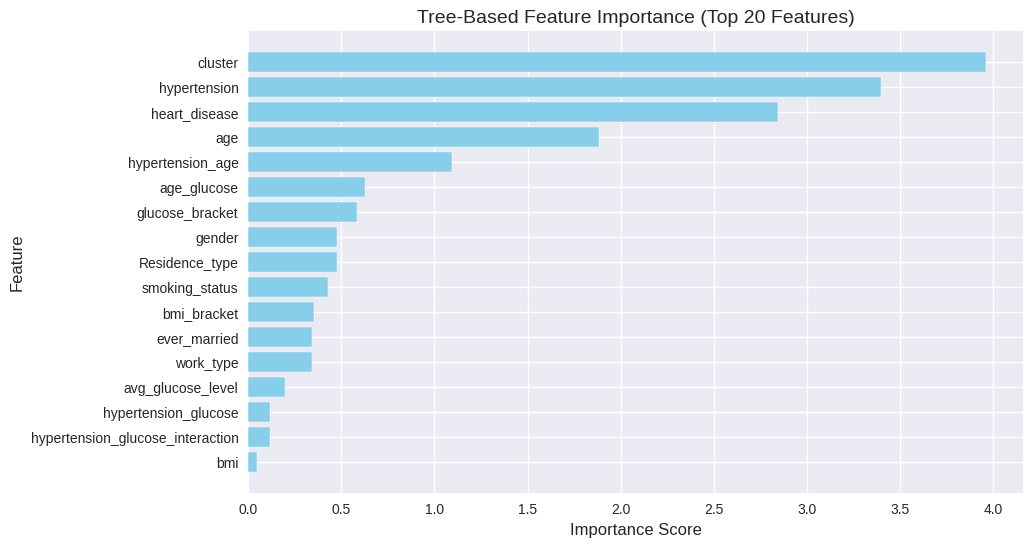

Decision Tree - Tree-Based Feature Importance


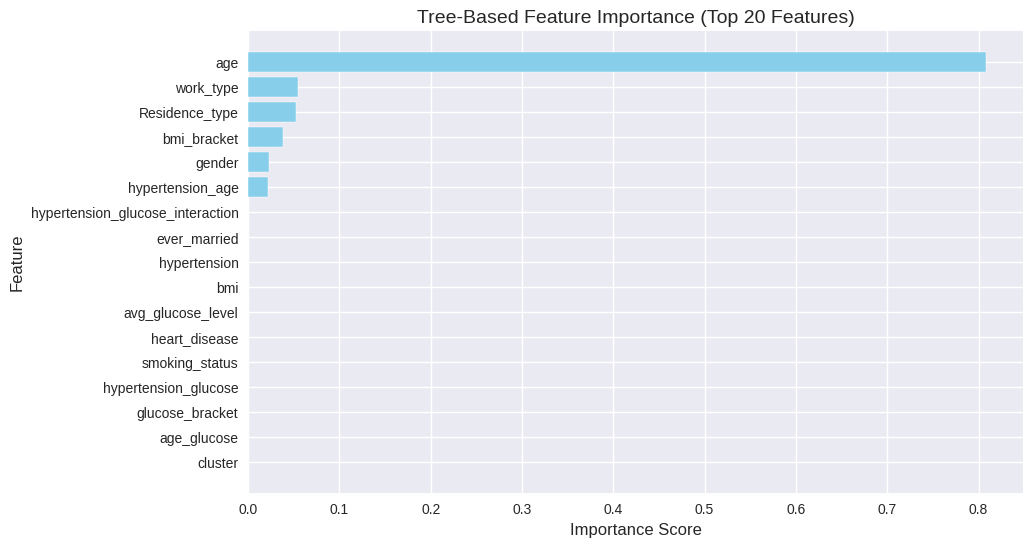

Decision Tree - Permutation-Based Feature Importance


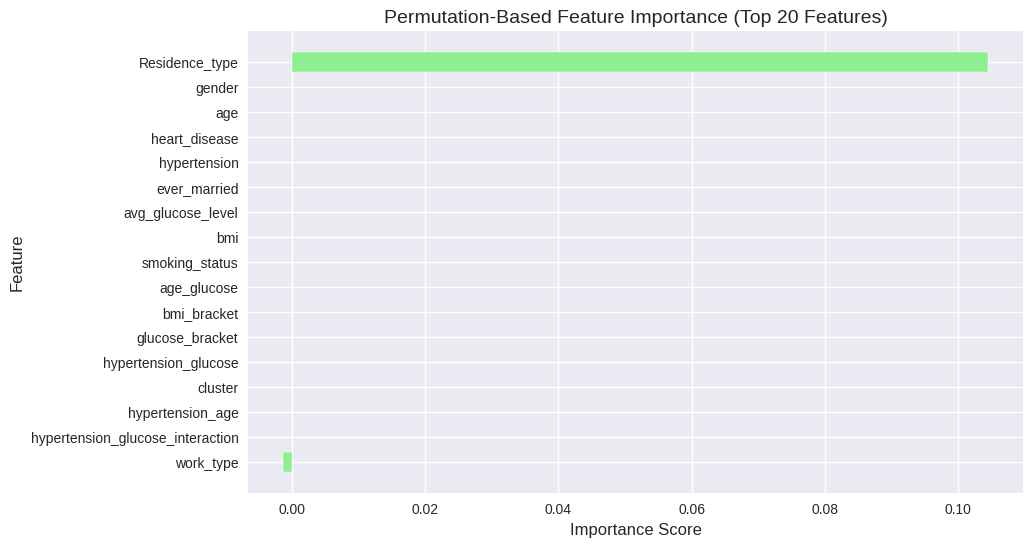

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score

# Function to calculate tree-based feature importance
def tree_based_feature_importance(model, feature_names):
    """Extract and plot tree-based feature importance."""
    if hasattr(model, 'feature_importances_'):
        importance = model.feature_importances_
    elif hasattr(model, 'coef_'):
        importance = np.abs(model.coef_[0])  # For Logistic Regression
    else:
        raise ValueError("Model does not support feature_importances_ or coef_.")

    # Create a DataFrame for feature importance
    feature_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    }).sort_values('Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(feature_importance_df['Feature'][:20], feature_importance_df['Importance'][:20], color='skyblue')
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title('Tree-Based Feature Importance (Top 20 Features)', fontsize=14)
    plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
    plt.show()

    return feature_importance_df

# Function to calculate permutation-based feature importance
def permutation_based_feature_importance(model, X_test, y_test, feature_names, n_repeats=10):
    """Calculate and plot permutation-based feature importance."""
    result = permutation_importance(
        model, X_test, y_test, n_repeats=n_repeats, random_state=42, scoring='accuracy'
    )

    # Create a DataFrame for permutation importance
    perm_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': result.importances_mean
    }).sort_values('Importance', ascending=False)

    # Plot permutation importance
    plt.figure(figsize=(10, 6))
    plt.barh(perm_importance_df['Feature'][:20], perm_importance_df['Importance'][:20], color='lightgreen')
    plt.xlabel('Importance Score', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title('Permutation-Based Feature Importance (Top 20 Features)', fontsize=14)
    plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
    plt.show()

    return perm_importance_df

# Example usage
# Assuming you have trained models (rf_model, lgbm_model, xgb_model, lr_model, dt_model)
# and test data (X_test, y_test)

# Tree-based feature importance for Random Forest
print("Random Forest - Tree-Based Feature Importance")
rf_feature_importance = tree_based_feature_importance(rf_model, X_test.columns)

# Permutation-based feature importance for Random Forest
print("Random Forest - Permutation-Based Feature Importance")
rf_perm_importance = permutation_based_feature_importance(rf_model, X_test, y_test, X_test.columns)

# Repeat for other models (LightGBM, XGBoost, Logistic Regression, Decision Tree)
# Example for LightGBM
print("LightGBM - Tree-Based Feature Importance")
lgbm_feature_importance = tree_based_feature_importance(lgbm_model, X_test.columns)

print("LightGBM - Permutation-Based Feature Importance")
lgbm_perm_importance = permutation_based_feature_importance(lgbm_model, X_test, y_test, X_test.columns)

# Example for XGBoost
print("XGBoost - Tree-Based Feature Importance")
xgb_feature_importance = tree_based_feature_importance(xgb_model, X_test.columns)

print("XGBoost - Permutation-Based Feature Importance")
xgb_perm_importance = permutation_based_feature_importance(xgb_model, X_test, y_test, X_test.columns)

# Example for Logistic Regression (uses coefficients instead of feature_importances_)
print("Logistic Regression - Feature Importance (Coefficients)")
lr_feature_importance = tree_based_feature_importance(lr_model, X_test.columns)

# Example for Decision Tree
print("Decision Tree - Tree-Based Feature Importance")
dt_feature_importance = tree_based_feature_importance(dt_model, X_test.columns)

print("Decision Tree - Permutation-Based Feature Importance")
dt_perm_importance = permutation_based_feature_importance(dt_model, X_test, y_test, X_test.columns)

In [4]:
!pip install numpy==2.0
!apt-get install -y llvm-14-dev
!pip install numba==0.56.4
!pip install --upgrade numpy
!pip install opencv-python --upgrade --force-reinstall
import shap
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np # Make sure to import numpy

# Function to calculate SHAP-based feature importance
def shap_based_feature_importance(model, X_test, feature_names):
    """Calculate and plot SHAP-based feature importance."""
    # Create a SHAP explainer
    if hasattr(model, 'predict_proba'):
        explainer = shap.TreeExplainer(model)  # For tree-based models
    else:
        explainer = shap.KernelExplainer(model.predict, X_test)  # For non-tree models

    # Calculate SHAP values
    shap_values = explainer.shap_values(X_test)

    # Summarize SHAP values for feature importance
    if isinstance(shap_values, list):  # For models with multiple outputs (e.g., binary classification)
        shap_values = np.abs(shap_values[1]).mean(axis=0)  # Use SHAP values for the positive class
    else:
        shap_values = np.abs(shap_values).mean(axis=0)  # For single-output models

    # Create a DataFrame for SHAP-based feature importance
    shap_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': shap_values
    }).sort_values('Importance', ascending=False)

    # Plot SHAP-based feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(shap_importance_df['Feature'][:20], shap_importance_df['Importance'][:20], color='purple')
    plt.xlabel('SHAP Value (Importance)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title('SHAP-Based Feature Importance (Top 20 Features)', fontsize=14)
    plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
    plt.show()

    return shap_importance_df

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 54.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
catboost 1.2.7 requires numpy<2.0,>=1.16.0, but you have numpy 2.0.0 which is incompatible.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  binfmt-support libpfm4 libz3-4 libz3-dev llvm-14 llvm-14-runtime llvm-14-tools python3-pygments
  python3-yaml
Suggested packages:
  llvm-14-doc python-pygments-doc ttf-bitstream-vera
The following NEW packages will be installed:
  binfmt-support libpfm4 libz3-4 libz3-dev l

ImportError: Numba needs NumPy 2.0 or less. Got NumPy 2.2.

In [1]:
# Function to calculate SHAP-based feature importance
def shap_based_feature_importance(model, X_test, feature_names):
    """Calculate and plot SHAP-based feature importance."""
    # Create a SHAP explainer
    if hasattr(model, 'predict_proba'):
        explainer = shap.TreeExplainer(model)  # For tree-based models
    else:
        explainer = shap.KernelExplainer(model.predict, X_test)  # For non-tree models

    # Calculate SHAP values
    shap_values = explainer.shap_values(X_test)

    # Summarize SHAP values for feature importance
    if isinstance(shap_values, list):  # For models with multiple outputs (e.g., binary classification)
        shap_values = np.abs(shap_values[1]).mean(axis=0)  # Use SHAP values for the positive class
    else:
        shap_values = np.abs(shap_values).mean(axis=0)  # For single-output models

    # Create a DataFrame for SHAP-based feature importance
    shap_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': shap_values
    }).sort_values('Importance', ascending=False)

    # Plot SHAP-based feature importance
    plt.figure(figsize=(10, 6))
    plt.barh(shap_importance_df['Feature'][:20], shap_importance_df['Importance'][:20], color='purple')
    plt.xlabel('SHAP Value (Importance)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title('SHAP-Based Feature Importance (Top 20 Features)', fontsize=14)
    plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
    plt.show()

    return shap_importance_df

# Example usage
# Assuming you have trained models (rf_model, lgbm_model, xgb_model, lr_model, dt_model)
# and test data (X_test)

# SHAP-based feature importance for Random Forest
print("Random Forest - SHAP-Based Feature Importance")
rf_shap_importance = shap_based_feature_importance(rf_model, X_test, X_test.columns)

# SHAP-based feature importance for LightGBM
print("LightGBM - SHAP-Based Feature Importance")
lgbm_shap_importance = shap_based_feature_importance(lgbm_model, X_test, X_test.columns)

# SHAP-based feature importance for XGBoost
print("XGBoost - SHAP-Based Feature Importance")
xgb_shap_importance = shap_based_feature_importance(xgb_model, X_test, X_test.columns)

# SHAP-based feature importance for Logistic Regression
print("Logistic Regression - SHAP-Based Feature Importance")
lr_shap_importance = shap_based_feature_importance(lr_model, X_test, X_test.columns)

# SHAP-based feature importance for Decision Tree
print("Decision Tree - SHAP-Based Feature Importance")
dt_shap_importance = shap_based_feature_importance(dt_model, X_test, X_test.columns)

Random Forest - SHAP-Based Feature Importance


NameError: name 'rf_model' is not defined